#**U.S. vs Washington State: Trends and County-Level Analysis of Electric Vehicle Adoption**

**Team 09 (Cohort A)**

**Team member:** Shanmathi Sivakumar, Inchara Ashok, Charlotte Wang, Riya Poojary, Sambisha Godi, Sanskruti Pradeep Pawar

Data: Electric Vehicle Population Data(2025)

License: Open Data Commons Open Database License (ODbL) version 1.0.

Access:https://catalog.data.gov/dataset/electric-vehicle-population-data

Data: Electric Vehicle Population Size History By County(2025)

License: Open Data Commons Open Database License (ODbL) version 1.0.

Access: https://catalog.data.gov/dataset/electric-vehicle-population-size-history-by-county

## Table of Contents
[Executive Summary](#executive-summary)  

[Problem Statement](#problem-statement)  

[Introduction & Motivation](#introduction--motivation)

[Data Preparation](#data-preparation)
1. [Storyline & Data Cleaning](#1-storyline--data-cleaning)  
   1.1 [Cleaning of the First Dataset](#11-cleaning-of-the-first-dataset)  
   1.2 [Cleaning of the Second Dataset](#12-cleaning-of-the-second-dataset)  
   1.3 [Merging the Datasets](#13-merging-the-datasets)

[Analysis and Visualizations](#analysis-and-visualizations)  

2. [National vs. State Adoption Trends](#2-national-vs-state-adoption-trends)  
   2.1 [Ratio of Electric to Non-Electric Vehicles](#21-ratio-of-electric-to-non-electric-vehicles)  
   2.2 [U.S. EV Trend BEV, PHEV, EV Total lines](#22-us-ev-trend-bev-phev-ev-total-lines)  
   2.3 [Washington EV Trend BEV, PHEV, EV Total lines](#23-washington-ev-trend-bev-phev-ev-total-lines)  
   2.4 [BEV Share Over Time (WA vs U.S.)](#24-bev-share-over-time-wa-vs-us)    
   2.5 [Summary](#25-summary)

   
3. [Market Composition & County-Level Adoption](#3-market-composition--county-level-adoption)  
   3.1 [BEV vs PHEV Share (WA vs Rest of U.S.)](#31-bev-vs-phev-share-wa-vs-rest-of-us)  
   3.2 [Top 10 Car Brands in Washington](#32-top-10-car-brands-in-washington)  
   3.3 [Top 10 Washington Counties by EV Adoption (%)](#33-top-10-washington-counties-by-ev-adoption)  
   3.4 [Top Utility Providers Supporting EVs](#34-top-utility-providers-supporting-evs)  
   3.5 [Summary](#35-summary)  

4. [Geographic Stability & Behavioral Drivers](#4-geographic-stability--behavioral-drivers)  
   4.1 [EV Adoption Fluctuation Heatmap (2017–2025)](#41-ev-growth-consistency-heatmap-2017–2025)  
   4.2 [Stability vs. Maturity: BEV Share vs. Growth Volatility](#42-stability-vs-maturity-bev-share-vs-growth-volatility)  
   4.3 [Range-Confidence Hypothesis: Avg BEV Range vs. EV Adoption](#43-range-confidence-hypothesis-avg-bev-range-vs-ev-adoption)  
   4.4 [Utility Scale vs. EV Adoption (Dual Axis)](#44-utility-scale-vs-ev-adoption-dual-axis)  
   4.5 [Summary](#45-summary)  

5. [Policy, Strategy & Investment Insights](#5-policy-strategy--investment-insights)  
   5.1 [CAFV Eligibility by Model Year](#51-cafv-eligibility-by-model-year)  
   5.2 [Utility Adoption Similarity (Top 3 Utilities)](#52-utility-adoption-similarity-top-3-utilities)  
   5.3 [EV Investment Priority Matrix (Washington Counties)](#53-ev-investment-priority-matrix-washington-counties)  
   5.4 [Summary](#54-summary)  


[Conclusion](#conclusion)

[Data Challenges and Resolution](#data-challenges-and-resolution)

[References](#references)

[Generative AI Disclosure](#generative-ai-disclosure)

## **Executive Summary**

This project compares electric vehicle (EV) adoption in Washington State to national trends to assess growth patterns, identify regional disparities, and propose practical strategies for a more equitable EV transition. We use datasets from multiple sources and Python tools such as Pandas, Matplotlib, and Seaborn for data cleaning, aggregation, and visualization to analyze EV adoption by year, state, and county.

**Main objectives:**

* EV Landscape Overview: To compare EV adoption across U.S. states and analyze how Washington’s market composition and leading utilities
differ from national trends.

* Adoption Growth and County Trends: To track EV adoption growth (2017–2025) and identify counties with consistent or rapid increases.

* Drivers of Adoption: To evaluate how electric range, CAFV eligibility, and utility coverage influence adoption patterns.

* Future Readiness and Policy Direction: To determine key factors for sustained growth and forecast Washington’s progress toward 2030 EV goals.

**Key Findings:**

* Washington ranks among the top states in EV penetration but faces local disparities between urban and rural areas.

* BEVs have shown faster growth than PHEVs, signaling improving range and consumer confidence.

* Tesla, Nissan, and Chevrolet dominate Washington’s EV market share.

* Counties served by large utilities show higher and more stable EV adoption.

* CAFV policy incentives have encouraged innovation and the shift toward full battery-electric models.

* Forecasts indicate Washington is on track to meet 2030 EV targets if rural infrastructure expands further.

## **Problem Statement**


•	To analyze differences in EV adoption across the U.S. and within Washington counties.

•	To identify relationships between EV adoption, vehicle characteristics, and utility infrastructure.

•	To assess how CAFV incentives and range improvements drive adoption behavior.

•	To create data-driven insights guiding equitable policy and infrastructure investment.


## **Introduction & motivation**

As the U.S. moves toward a clean transportation future, understanding EV adoption trends is critical for shaping effective policies and ensuring equitable access. Washington, a national leader in EV growth, provides valuable insight into how vehicle technology, infrastructure, and incentives interact to accelerate electrification and inform broader adoption strategies.


This analysis reveals both progress and gaps in the EV adoption landscape, emphasizing the need for inclusive growth beyond urban centers. By identifying the factors driving success and the regions lagging, policymakers, utilities, and automakers can better coordinate efforts to expand charging networks, strengthen CAFV programs, and ensure equitable access to clean mobility. Strengthening these areas will help Washington — and the U.S. at large — achieve a sustainable, data-informed transition toward a fully electrified transportation system.

## **Data Preparation**

### 1. Storyline & Data Cleaning

In [1]:
# Mount Google Drive in Colab to access files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# In this step, we import the necessary Python libraries for our analysis.
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
from textwrap import shorten
from matplotlib.ticker import LogLocator, ScalarFormatter

In [3]:
# Load the U.S. county-level EV population dataset
ev_population_county_original = pd.read_csv(
    "/content/drive/MyDrive/780-Team 9-project/Electric_Vehicle_Population_Size_History_By_County.csv")

# Create a copy to work on, so the original remains unchanged
ev_population_county = ev_population_county_original.copy()

# Load the Washington state-specific EV population dataset
ev_population_WA_original = pd.read_csv(
    "/content/drive/MyDrive/780-Team 9-project/Electric_Vehicle_Population_Data.csv")

# Create a copy to work on for Washington data as well
ev_population_WA = ev_population_WA_original.copy()


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data Dictionary

**A) Electric Vehicle Population Data (2025):**

This dataset contains the records of Battery Electric Vehicles
(BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) registered through the
Washington State Department of Licensing (DOL). This will be the primary
source for our analysis on electric vehicle population, adoption patterns,
and regional distribution. (Source: Washington State Department of
Licensing)
Data Dictionary


| **Column**                                        | **Description**                                                                               |
| ------------------------------------------------- | --------------------------------------------------------------------------------------------- |
| VIN (1-10)                                        | Identifier of the vehicle; serves as a unique code, not a number.                             |
| County                                            | Name of the county where the vehicle is registered.                                           |
| City                                              | Name of the city where the vehicle owner resides.                                             |
| State                                             | Two-letter U.S. state code.                                                                   |
| Postal Code                                       | Postal code of the registration address (leading zeros matter, e.g., 02115).                  |
| Model Year                                        | Year the vehicle model was manufactured, used to analyze trends or vehicle age.               |
| Make                                              | Manufacturer of the vehicle (e.g., Tesla, Ford, Nissan).                                      |
| Model                                             | Specific vehicle model name (e.g., Leaf, Mustang Mach-E).                                     |
| Electric Vehicle Type                             | Classification of vehicle type (e.g., BEV, PHEV).                                             |
| Clean Alternative Fuel Vehicle (CAFV) Eligibility | Indicates whether the vehicle qualifies as a clean fuel vehicle (“Eligible”, “Not Eligible”). |
| Electric Range                                    | Driving range in miles that the vehicle can travel on electric power.                         |
| Base MSRP                                         | Manufacturer’s suggested retail price in U.S. dollars.                                        |
| Legislative District                              | Number representing the legislative district of the registered address.                       |
| DOL Vehicle ID                                    | Department of Licensing identifier; unique but non-numeric.                                   |
| Vehicle Location                                  | Geographic coordinates of vehicle registration, stored as text.                               |
| Electric Utility                                  | Name of the electric utility provider serving the vehicle’s registered area.                  |
technically numeric, but usually treated as categorical identifiers. |


**B) Electric Vehicle Population Size History by County:**

This dataset contains monthly records of electric vehicle registrations
across United States(US) counties from January 2017 through August
2025. It serves as a primary source for analyzing county-level EV adoption
trends, comparing BEV and PHEV growth, and evaluating changes in total
vehicle population over time. (Source: Washington State Department of
Licensing).

| **Column**                               | **Description**                                                                                                       |
| ---------------------------------------- | --------------------------------------------------------------------------------------------------------------------- |
| Date                                     | Counts of registered vehicles are taken on this day (the end of this month).                                          |
| County                                   | Geographic region of a state where a vehicle’s owner resides.                                                         |
| State                                    | Geographic region of the country associated with the record.                                                          |
| Vehicle Primary Use                      | Describes the primary intended use of the vehicle.                                                                    |
| Battery Electric Vehicles (BEVs)         | Count of vehicles propelled solely by an onboard electric battery.                                                    |
| Plug-In Hybrid Electric Vehicles (PHEVs) | Count of vehicles propelled by energy partially sourced from an onboard battery rechargeable from an external source. |
| Electric Vehicle (EV) Total              | Sum of Battery Electric Vehicles (BEVs) and Plug-In Hybrid Electric Vehicles (PHEVs).                                 |
| Non-Electric Vehicle Total               | Count of vehicles that are not electric.                                                                              |
| Total Vehicles                           | All powered vehicles registered in the county, including electric ones.                                               |
| Percent Electric Vehicles                | Percentage of electric vehicles versus non-electric vehicles.                                                         |


### 1.1 Cleaning of the first dataset

In [5]:
# Prints the number of rows and columns in the Washington EV population dataset
print("ROWS, COLS:", ev_population_WA.shape)
# Prints the list of all column names in the Washington EV population dataset
print("\nCOLUMNS:\n", ev_population_WA.columns.tolist())

ROWS, COLS: (261698, 17)

COLUMNS:
 ['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility', '2020 Census Tract']


In [6]:
# Counts the number of missing (null) values in each column of the Washington EV population dataset
ev_population_WA.isnull().sum()

,0
VIN (1-10),0
County,10
City,10
State,0
Postal Code,10
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [7]:
# Counts how many duplicate rows exist in the Washington EV population dataset
ev_population_WA.duplicated().sum()

np.int64(0)

In [8]:
# Counts duplicate records based only on the VIN (1-10) column to check for repeated vehicle entries
ev_population_WA.duplicated(subset=["VIN (1-10)"]).sum()

np.int64(245945)

**What is the reason for duplicate VINs(1-10) across multiple rows?**
- These are not true duplicates, but different registrations of the same vehicle model.
- Example: VIN prefix 1C4JJXN64P → Jeep Wrangler (2023, PHEV, 21-mile range).
- All share the same make, model, year, and battery type.
- They differ by city, county, utility, and vehicle ID.
- **The dataset truncates VINs to the first 10 digits, so unique full VINs look identical here.**

In [9]:
# Show rows with any missing values in the Washington EV population dataset
ev_population_WA[ev_population_WA.isnull().any(axis=1)].head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
353,1N4AZ0CP2G,Sussex,Stanhope,NJ,7874.0,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,NaN,293468871,POINT (-74.70893 40.90367),NON WASHINGTON STATE ELECTRIC UTILITY,3.403737e+10
354,5YJ3E1EB2M,NaN,NaN,NS,NaN,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,NaN,179569743,NaN,NaN,NaN
358,5YJXCAE24H,NaN,NaN,BC,NaN,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200.0,0.0,NaN,159850029,NaN,NaN,NaN


In [10]:
# Identify rows where all key location-related information is missing
# These rows might correspond to vehicles registered outside Washington or with incomplete data
foreign_vins = ev_population_WA[
    ev_population_WA[["County", "City", "Postal Code", "Electric Utility", "Vehicle Location"]].isnull().all(axis=1)]

# Display the filtered rows with missing location information
foreign_vins.head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
354,5YJ3E1EB2M,NaN,NaN,NS,NaN,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,NaN,179569743,NaN,NaN,NaN
358,5YJXCAE24H,NaN,NaN,BC,NaN,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200.0,0.0,NaN,159850029,NaN,NaN,NaN
176443,3FA6P0SU7E,NaN,NaN,AE,NaN,2014,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.0,0.0,NaN,255045136,NaN,NaN,NaN


In [11]:
# Select rows where 'County' information is missing
null_county_states = ev_population_WA[ev_population_WA["County"].isnull()]

# Count how many missing-County rows come from each 'State'
state_null_counts = null_county_states["State"].value_counts()

# Display the counts per state
state_null_counts

,count
State,
BC,3
AE,2
AP,2
NS,1
ON,1
QC,1


**Output: Non-US states or special codes found in the dataset:**

NS (Nova Scotia, Canada)

BC (British Columbia, Canada)

ON (Ontario, Canada)

QC (Quebec, Canada)

AE (Armed Forces Europe / Middle East — APO military addresses)

AP (Armed Forces Pacific — APO military addresses)

**What we found so far is:**

The rows with missing County, City, Postal Code, Electric Utility, Vehicle Location, 2020 Census Tract are strongly correlated (from the missingno heatmap).

Almost all of these rows belong to non-US states/territories (BC, ON, QC, NS, AE, AP, etc.).

So the missing values are not random — they’re because those states don’t belong to Washington (WA) or even the U.S. system.

In [12]:
# Define valid U.S. state abbreviations (including DC)
us_states = [
    "AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA",
    "KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ",
    "NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT",
    "VA","WA","WV","WI","WY","DC"
]

# Filter: Keep only valid U.S. states
ev_population_us = ev_population_WA[ev_population_WA["State"].isin(us_states)].copy()

# Drop non-U.S. state rows (not needed for our analysis)
print(f"Rows before filtering: {ev_population_WA.shape[0]}")
print(f"Rows after filtering: {ev_population_us.shape[0]}")
print(f"Dropped rows: {ev_population_WA.shape[0] - ev_population_us.shape[0]}")


Rows before filtering: 261698
Rows after filtering: 261687
Dropped rows: 11


**What we did with the Non-US data:**

We identified both U.S. and non-U.S. entries in the dataset. To maintain consistency and focus our analysis on U.S.-based electric vehicle adoption, we dropped all non-U.S. records. This ensures that our dataset includes only valid U.S. states (including the District of Columbia) and avoids mixing data from regions that follow different reporting or policy frameworks.

For example,the 11th row corresponded to GU (Guam) — a U.S. territory that is not a state. Even though Guam’s row did not contain null values, we removed it to ensure that our analysis only includes valid U.S. states and the District of Columbia.

In [13]:
# Filter rows in the US dataset where either 'Electric Range' or 'Base MSRP' is missing
missing_values = ev_population_us[
    ev_population_us[["Electric Range", "Base MSRP"]].isnull().any(axis=1)
]

# Display the rows with missing key values
missing_values

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
4858,ZHWUC1ZM5S,King,Seattle,WA,98125.0,2025,LAMBORGHINI,REVUELTO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,46.0,282538896,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
83839,ZHWUC1ZM3S,King,Mercer Island,WA,98040.0,2025,LAMBORGHINI,REVUELTO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,41.0,279110842,POINT (-122.21238 47.57816),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
185703,ZHWUC1ZM5S,Snohomish,Snohomish,WA,98296.0,2025,LAMBORGHINI,REVUELTO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,1.0,277331204,POINT (-122.1389 47.87115),PUGET SOUND ENERGY INC,5.306105e+10


**Output:** Only three Lamborghini REVUELTO entries in the dataset have missing values for Electric Range and Base MSRP. All other REVUELTO rows have numeric values, depending on their CAFV eligibility.

In [14]:
Model_missing_values = ev_population_us[
    ev_population_us["Model"] == "REVUELTO"
]

Model_missing_values.head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
4858,ZHWUC1ZM5S,King,Seattle,WA,98125.0,2025,LAMBORGHINI,REVUELTO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,46.0,282538896,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
83839,ZHWUC1ZM3S,King,Mercer Island,WA,98040.0,2025,LAMBORGHINI,REVUELTO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,41.0,279110842,POINT (-122.21238 47.57816),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
148310,ZHWUC1ZM6R,Spokane,Liberty Lake,WA,99019.0,2024,LAMBORGHINI,REVUELTO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6.0,0.0,4.0,278192862,POINT (-117.1015 47.66829),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10


**We found out that:** The missing values are model-specific.

Only the Lamborghini REVUELTO entries that have Clean Alternative Fuel Vehicle (CAFV) Eligibility = "Clean Alternative Fuel Vehicle Eligible" are missing values for Electric Range and Base MSRP.

Other REVUELTO entries, where CAFV eligibility is “Not eligible for CAFV”, contain numeric values—typically 6 miles for Electric Range and 0 for Base MSRP.

This suggests that the missingness is intentional or model-specific, rather than random, and may reflect special reporting rules for eligible CAFV vehicles.

In [15]:
# Remove the 3 Lamborghini REVUELTO rows where either Electric Range or Base MSRP is missing
# These missing values are model-specific and limited, so dropping them is reasonable
ev_population_us = ev_population_us.drop(
    ev_population_us[
        (ev_population_us["Make"] == "LAMBORGHINI") &
        (ev_population_us["Model"] == "REVUELTO") &
        (ev_population_us[["Electric Range", "Base MSRP"]].isnull().any(axis=1))
    ].index
)

# Verify that the problematic REVUELTO rows are removed
ev_population_us[ev_population_us["Make"]=="LAMBORGHINI"].head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
42910,ZPBUD6ZL3S,King,Kirkland,WA,98033.0,2025,LAMBORGHINI,URUS,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,37.0,0.0,45.0,280371724,POINT (-122.2066 47.67887),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
52615,ZPBUD6ZL3S,King,Bellevue,WA,98008.0,2025,LAMBORGHINI,URUS,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,37.0,0.0,48.0,279139563,POINT (-122.11867 47.63131),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
91571,ZPBUD6ZL3S,King,Mercer Island,WA,98040.0,2025,LAMBORGHINI,URUS,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,37.0,0.0,41.0,284522073,POINT (-122.21238 47.57816),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


In [16]:
# Filter rows in the US dataset where 'Vehicle Location' is missing
# This identifies vehicles with incomplete location information
missing_vehicle_location = ev_population_us[ev_population_us["Vehicle Location"].isnull()]

# Display the rows with missing 'Vehicle Location'
missing_vehicle_location.head(3)


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
133574,JTDKARFP1H,Pacific,Long Beach,WA,98634.0,2017,TOYOTA,PRIUS PRIME (PHEV),Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,19.0,171247282,NaN,BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF P...,5.304995e+10
140028,7SAYGDEE0N,Pacific,Long Beach,WA,98634.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,19.0,211479649,NaN,BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF P...,5.304995e+10
140864,7PDSGABA9R,Pacific,Long Beach,WA,98634.0,2024,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,19.0,261660878,NaN,BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF P...,5.304995e+10


**Output:** There is a data inconsistency in the dataset

*  The City column lists Long Beach, which is in Washington, USA, but the Postal Code for this row is 98634, which actually corresponds to a location in Germany.
*  This indicates that the row has mismatched location information and may require correction or removal for accurate analysis.

In [17]:
# Remove rows from the US dataset where 'Vehicle Location' is missing
# These rows have incomplete location information and cannot be accurately analyzed
ev_population_us = ev_population_us.dropna(subset=['Vehicle Location'])

In [18]:
# Checks whether missing legislative districts occur only outside Washington
missing_leg_dist = ev_population_us[ev_population_us['Legislative District'].isnull()]

# Display the unique electric utilities for these rows
# This helps identify which utilities are associated with missing legislative districts
missing_leg_dist['Electric Utility'].unique()

array(['NON WASHINGTON STATE ELECTRIC UTILITY'], dtype=object)

**Output**:


1. The Legislative District column is only null for rows where Electric Utility = "NON WASHINGTON STATE ELECTRIC UTILITY".
2. In other words, whenever a vehicle is registered outside Washington State, the dataset does not include a legislative district.
3. This confirms that the missing values are systematic and reflect vehicles not located in Washington, rather than being random.

In [19]:
# Create a separate dataframe for non-Washington vehicles (missing Legislative District)
non_WA_vehicles = ev_population_us[ev_population_us['Legislative District'].isnull()].copy()

# Keep only Washington State vehicles with valid Legislative Districts
ev_population_WA_only = ev_population_us[ev_population_us['Legislative District'].notna()].copy()

# Display new shapes
print("Non-Washington vehicles:", non_WA_vehicles.shape)
print("Washington-only dataset:", ev_population_WA_only.shape)

Non-Washington vehicles: (617, 17)
Washington-only dataset: (261059, 17)


In [20]:
# Count the number of missing values in each column of the cleaned Washington dataset
# This helps verify that critical columns (like Legislative District, Vehicle Location) are now complete
ev_population_WA_only.isnull().sum()


,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [21]:
# Count how many zero values each column has
zero_counts = (ev_population_WA_only == 0).sum()

# Filter to show only columns that actually contain zeros
zero_counts = zero_counts[zero_counts > 0].sort_values(ascending=False)

print("Columns with zero values:\n")
print(zero_counts)

Columns with zero values:

Base MSRP         257886
Electric Range    160536
dtype: int64


**We found out that:**
- Base MSRP is missing for 98.8% of vehicles, making it unsuitable for analysis, so we are dropping it.
- Zeros in Electric Range occur in 61.5% of rows, mainly in BEVs, and appear to be model- and type-specific rather than random, so we are replacing them with `NaN` to flag missing data.

In [22]:
# Drop 'Base MSRP' as it is mostly missing and not useful
ev_population_WA_only.drop(columns=['Base MSRP'], inplace=True)

# Replace 0 values in 'Electric Range' with NaN to flag missing data
ev_population_WA_only['Electric Range'] = ev_population_WA_only['Electric Range'].replace(0, np.nan)

# Confirm changes
ev_population_WA_only[['Electric Range']].head()

,Electric Range
0,6.0
1,37.0
2,26.0
3,NaN
4,220.0


In [23]:
# Drop unnecessary columns but keep DOL Vehicle ID
cols_to_drop = [
    "VIN (1-10)",
    "2020 Census Tract"
]
ev_population_WA_only.drop(columns=cols_to_drop, inplace=True)

# Fix Postal Code formatting: remove .0 and convert to string
ev_population_WA_only["Postal Code"] = (
    ev_population_WA_only["Postal Code"]
    .apply(lambda x: int(x) if pd.notnull(x) else np.nan)
)

# Fix Legislative District formatting: remove .0 and convert to integer
ev_population_WA_only["Legislative District"] = (
    ev_population_WA_only["Legislative District"]
    .apply(lambda x: int(x) if pd.notnull(x) else np.nan)
)

# Verify changes
print("Updated columns:", ev_population_WA_only.columns.tolist())
print(ev_population_WA_only[["Postal Code", "Legislative District"]].head())


Updated columns: ['County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility']
   Postal Code  Legislative District
0        98902                    15
1        98366                    26
2        98346                    23
3        98501                    35
4        98576                    20


**In this step, we refine our **Washington-only EV dataset** by removing unnecessary columns and standardizing key fields for consistency and clarity.**

- Dropping Unnecessary Columns
  - `VIN (1-10)` → Contains only partial VIN numbers, not useful for analysis.
  - `2020 Census Tract` → Geospatial identifier not needed for county or district-level analysis.

- Fixing Data Formats
  - **Postal Code** → Originally stored as a float (e.g., `98115.0`); converted to a clean int (e.g., `"98115"`) for proper grouping and readability.
  - **Legislative District** → Converted from float to integer (e.g., `36.0` → `36`) to accurately represent Washington’s legislative districts.


In [24]:

ev_population_WA_only.head(3)

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility
0,Yakima,Yakima,WA,98902,2013,TOYOTA,PRIUS,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6.0,15,165252538,POINT (-120.51904 46.59783),PACIFICORP
1,Kitsap,Port Orchard,WA,98366,2025,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,37.0,26,278572521,POINT (-122.63847 47.54103),PUGET SOUND ENERGY INC
2,Kitsap,Kingston,WA,98346,2024,MAZDA,CX-90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,23,275123642,POINT (-122.4977 47.79802),PUGET SOUND ENERGY INC


In [25]:
# Display a summary of the cleaned Washington dataset
# Shows number of rows, column names, data types, and non-null counts
ev_population_WA_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 261059 entries, 0 to 261697
Data columns (total 14 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   County                                             261059 non-null  object 
 1   City                                               261059 non-null  object 
 2   State                                              261059 non-null  object 
 3   Postal Code                                        261059 non-null  int64  
 4   Model Year                                         261059 non-null  int64  
 5   Make                                               261059 non-null  object 
 6   Model                                              261059 non-null  object 
 7   Electric Vehicle Type                              261059 non-null  object 
 8   Clean Alternative Fuel Vehicle (CAFV) Eligibility  261059 non-null  object 
 9 

| **Column**           | **Suggested Type**      | **Description**                                                                                       |
| -------------------- | ----------------------- | ----------------------------------------------------------------------------------------------------- |
| Postal Code          | Categorical (string) ⚠️ | Looks numeric but actually represents labels or IDs. Leading zeros matter (e.g., 02115 in MA).        |
| Legislative District | Categorical (string) ⚠️ | A number representing the district, which can be analyzed numerically but is technically categorical. |
| DOL Vehicle ID       | Categorical (ID) ⚠️     | Identifier with no arithmetic meaning; should be treated as a string.                                 |
| Vehicle Location     | Categorical (string) ⚠️ | Coordinates stored as text; should remain as string unless separated into latitude and longitude.     |


**We will:**
Convert the following columns to string (object) type: Postal Code, Legislative District, and DOL Vehicle ID

Keep the following columns as numeric: Model Year, Electric Range, Base MSRP

In [26]:
# Convert selected columns to string because they are categorical or ID-like
cols_to_string = ["Postal Code", "Legislative District", "DOL Vehicle ID"]
ev_population_WA_only[cols_to_string] = ev_population_WA_only[cols_to_string].astype(str)

# Convert numeric columns to appropriate numeric types
# Any invalid parsing will be set as NaN (though these should already be clean)
cols_to_numeric = ["Model Year", "Electric Range"]
ev_population_WA_only[cols_to_numeric] = ev_population_WA_only[cols_to_numeric].apply(pd.to_numeric, errors='coerce')

# Verify data types after conversion
ev_population_WA_only.dtypes

,0
County,object
City,object
State,object
Postal Code,object
Model Year,int64
Make,object
Model,object
Electric Vehicle Type,object
Clean Alternative Fuel Vehicle (CAFV) Eligibility,object
Electric Range,float64


In [27]:
# Select all columns with object (string) dtype
text_cols = ev_population_WA_only.select_dtypes(include='object').columns

# Standardize text: remove leading/trailing whitespace and convert to uppercase
# This ensures consistency for categorical/ID-like columns
for col in text_cols:
    ev_population_WA_only[col] = ev_population_WA_only[col].str.strip().str.upper()

In [28]:
# Display the first few rows of the cleaned Washington EV dataset
# This allows a quick inspection of data types, formatting, and recent transformations
ev_population_WA_only.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility
0,YAKIMA,YAKIMA,WA,98902,2013,TOYOTA,PRIUS,PLUG-IN HYBRID ELECTRIC VEHICLE (PHEV),NOT ELIGIBLE DUE TO LOW BATTERY RANGE,6.0,15,165252538,POINT (-120.51904 46.59783),PACIFICORP
1,KITSAP,PORT ORCHARD,WA,98366,2025,FORD,ESCAPE,PLUG-IN HYBRID ELECTRIC VEHICLE (PHEV),CLEAN ALTERNATIVE FUEL VEHICLE ELIGIBLE,37.0,26,278572521,POINT (-122.63847 47.54103),PUGET SOUND ENERGY INC
2,KITSAP,KINGSTON,WA,98346,2024,MAZDA,CX-90,PLUG-IN HYBRID ELECTRIC VEHICLE (PHEV),NOT ELIGIBLE DUE TO LOW BATTERY RANGE,26.0,23,275123642,POINT (-122.4977 47.79802),PUGET SOUND ENERGY INC
3,THURSTON,OLYMPIA,WA,98501,2023,TESLA,MODEL Y,BATTERY ELECTRIC VEHICLE (BEV),ELIGIBILITY UNKNOWN AS BATTERY RANGE HAS NOT B...,NaN,35,249569323,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC
4,THURSTON,RAINIER,WA,98576,2019,TESLA,MODEL 3,BATTERY ELECTRIC VEHICLE (BEV),CLEAN ALTERNATIVE FUEL VEHICLE ELIGIBLE,220.0,20,283135107,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC


In [29]:
# Check which manufacturers have vehicles listed as Model Year 2026
# This verifies if only Tesla has 2026 models in the dataset
ev_population_WA_only[ev_population_WA_only['Model Year'] == 2026]['Make'].value_counts()

,count
Make,
TESLA,4791
BMW,224
KIA,184
HYUNDAI,98
CADILLAC,96
RIVIAN,21
GENESIS,14
VOLVO,11
GMC,6


**Output:**

The Model Year 2026 entries likely exist because these vehicles are pre-ordered.

Even though the current year is earlier, manufacturers like Tesla may list upcoming models in the dataset to reflect anticipated registrations or reservations, which is why the dataset includes them.

In [30]:
# Identify rows where 'Model Year' is outside the expected range (2000–2026)
# These may represent data entry errors or unusual pre-orders
inconsistent_years = ev_population_WA_only[
    (ev_population_WA_only['Model Year'] < 2000) |
    (ev_population_WA_only['Model Year'] > 2026)
]

# Display a summary of counts for these inconsistent model years
print(inconsistent_years['Model Year'].value_counts())

Series([], Name: count, dtype: int64)


In [31]:
# Identify Electric Range inconsistencies
# Negative values or extremely high values (>400 miles) are suspicious
inconsistent_range = ev_population_WA_only[
    (ev_population_WA_only['Electric Range'] < 1) |
    (ev_population_WA_only['Electric Range'] > 400)
]

print("Electric Range inconsistencies:", len(inconsistent_range))

Electric Range inconsistencies: 0


In [32]:
# Clean Washington EV dataset with separated Latitude and Longitude
ev_population_WA_only_clean = (
    ev_population_WA_only
    .assign(
        Longitude=ev_population_WA_only['Vehicle Location']
            .str.replace(r'POINT \(|\)', '', regex=True)
            .str.strip()
            .str.split(' ', expand=True)[0]
            .astype(float),
        Latitude=ev_population_WA_only['Vehicle Location']
            .str.replace(r'POINT \(|\)', '', regex=True)
            .str.strip()
            .str.split(' ', expand=True)[1]
            .astype(float)
    )

    # Drop the original Vehicle Location column
    .drop(columns=['Vehicle Location'])
)

# Display the cleaned dataset shape
print("Cleaned Washington dataset shape:", ev_population_WA_only_clean.shape)


Cleaned Washington dataset shape: (261059, 15)


In [33]:
ev_population_WA_only_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 261059 entries, 0 to 261697
Data columns (total 15 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   County                                             261059 non-null  object 
 1   City                                               261059 non-null  object 
 2   State                                              261059 non-null  object 
 3   Postal Code                                        261059 non-null  object 
 4   Model Year                                         261059 non-null  int64  
 5   Make                                               261059 non-null  object 
 6   Model                                              261059 non-null  object 
 7   Electric Vehicle Type                              261059 non-null  object 
 8   Clean Alternative Fuel Vehicle (CAFV) Eligibility  261059 non-null  object 
 9 

**What we did:**

We keep the original Vehicle Location column unchanged and create two new columns: Longitude and Latitude.

In [34]:
# clean Washington state-specific EV population dataset
ev_population_WA_only_clean.head(3)

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Electric Utility,Longitude,Latitude
0,YAKIMA,YAKIMA,WA,98902,2013,TOYOTA,PRIUS,PLUG-IN HYBRID ELECTRIC VEHICLE (PHEV),NOT ELIGIBLE DUE TO LOW BATTERY RANGE,6.0,15,165252538,PACIFICORP,-120.51904,46.59783
1,KITSAP,PORT ORCHARD,WA,98366,2025,FORD,ESCAPE,PLUG-IN HYBRID ELECTRIC VEHICLE (PHEV),CLEAN ALTERNATIVE FUEL VEHICLE ELIGIBLE,37.0,26,278572521,PUGET SOUND ENERGY INC,-122.63847,47.54103
2,KITSAP,KINGSTON,WA,98346,2024,MAZDA,CX-90,PLUG-IN HYBRID ELECTRIC VEHICLE (PHEV),NOT ELIGIBLE DUE TO LOW BATTERY RANGE,26.0,23,275123642,PUGET SOUND ENERGY INC,-122.49770,47.79802


**Summary:**

Cleaned the Washington EV dataset to 261,059 rows by removing non-U.S./non-WA records and a few model-specific problematic rows (e.g., three REVUELTO entries). Dropped Base MSRP, converted zeros in Electric Range to NaN, and normalized text fields (uppercasing/stripping) for consistent grouping. Standardized ID-like columns to strings, fixed postal/legislative district formats, and split Vehicle Location into numeric Longitude and Latitude. The result is a WA-only, analysis-ready table with consistent types and clearer geolocation for mapping and aggregation.

### 1.2 Cleaning of the second dataset

In [35]:
# Display the first few rows of the U.S. county-level EV population dataset
ev_population_county.head(3)

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,August 31 2021,San Bernardino,CA,Passenger,1,0,1,414,415,0.24
1,June 30 2022,Cass,MN,Passenger,0,1,1,3,4,25.00
2,May 31 2024,Norfolk,VA,Passenger,1,1,2,268,270,0.74


In [36]:
# Display a summary of the U.S. county-level EV population dataset
ev_population_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112 entries, 0 to 29111
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      29112 non-null  object 
 1   County                                    29008 non-null  object 
 2   State                                     29008 non-null  object 
 3   Vehicle Primary Use                       29112 non-null  object 
 4   Battery Electric Vehicles (BEVs)          29112 non-null  int64  
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  29112 non-null  int64  
 6   Electric Vehicle (EV) Total               29112 non-null  int64  
 7   Non-Electric Vehicle Total                29112 non-null  int64  
 8   Total Vehicles                            29112 non-null  int64  
 9   Percent Electric Vehicles                 29112 non-null  float64
dtypes: float64(1), int64(5), object(4)

In [37]:
# Convert the 'Date' column to datetime format for easier time-based analysis
ev_population_county['Date'] = pd.to_datetime(ev_population_county['Date'])

# Display the updated dataset
ev_population_county.head(3)

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,2021-08-31,San Bernardino,CA,Passenger,1,0,1,414,415,0.24
1,2022-06-30,Cass,MN,Passenger,0,1,1,3,4,25.00
2,2024-05-31,Norfolk,VA,Passenger,1,1,2,268,270,0.74


**What we are doing next:**

We are changing the Date column to datetime format. Originally, the column may be stored as a string, which makes it difficult to perform time-based operations.

We will converting it to datetime allows us to filter by date, group by month or year, and plot trends over time. This is a standard step for any dataset that involves temporal analysis.

In [38]:
# Count the number of missing values in each column of the county-level EV dataset
# This helps identify which columns may need cleaning or imputation
ev_population_county.isnull().sum()

,0
Date,0
County,104
State,104
Vehicle Primary Use,0
Battery Electric Vehicles (BEVs),0
Plug-In Hybrid Electric Vehicles (PHEVs),0
Electric Vehicle (EV) Total,0
Non-Electric Vehicle Total,0
Total Vehicles,0
Percent Electric Vehicles,0


**Dropping rows with missing County and State values**

On inspection, there are 104 rows where both County and State are missing. These rows appear to represent aggregated totals across all counties for each month, rather than individual county-level data.

Since our analysis focuses on county-level insights, retaining these rows would result in double-counting. Therefore, we will drop them to ensure accuracy in county-level analysis.

In [39]:
# Remove rows where 'County' is null
# These rows likely represent dataset-level monthly totals rather than individual counties
ev_population_US_county_clean = ev_population_county.dropna(subset=['County']).copy()

# Display the shape of the cleaned dataset
print(f"\nData shape after dropping null County rows: {ev_population_US_county_clean.shape}")


Data shape after dropping null County rows: (29008, 10)


In [40]:
# Select all columns with object (string) dtype
text_cols = ev_population_US_county_clean.select_dtypes(include='object').columns

# Standardize text: remove leading/trailing whitespace and convert to uppercase
for col in text_cols:
    ev_population_US_county_clean[col] = ev_population_US_county_clean[col].str.strip().str.upper()

In [41]:
ev_population_US_county_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29008 entries, 0 to 29111
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Date                                      29008 non-null  datetime64[ns]
 1   County                                    29008 non-null  object        
 2   State                                     29008 non-null  object        
 3   Vehicle Primary Use                       29008 non-null  object        
 4   Battery Electric Vehicles (BEVs)          29008 non-null  int64         
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  29008 non-null  int64         
 6   Electric Vehicle (EV) Total               29008 non-null  int64         
 7   Non-Electric Vehicle Total                29008 non-null  int64         
 8   Total Vehicles                            29008 non-null  int64         
 9   Percent Electric Vehicles        

In [42]:
ev_population_US_county_clean.head(3)

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,2021-08-31,SAN BERNARDINO,CA,PASSENGER,1,0,1,414,415,0.24
1,2022-06-30,CASS,MN,PASSENGER,0,1,1,3,4,25.00
2,2024-05-31,NORFOLK,VA,PASSENGER,1,1,2,268,270,0.74


Rows with missing County (and State) values have been removed from the dataset.

This ensures that our dataset only contains county-level observations, avoiding aggregated totals that could skew analysis.

The cleaned dataset is now stored in ev_population_county_clean and is ready for further analysis and EDA.

**Summary:**

Converted Date to datetime, removed 104 rows with null County/State (these were dataset-level monthly aggregates, not counties), and standardized text fields (trim + uppercase) for consistent grouping.
Resulting county-level table has 29,008 rows (ev_population_US_county_clean) with clean numeric counts and Percent Electric Vehicles ready for time-series analysis and EDA.

### 1.3 Merging the datasets

In [43]:
# Work on copies to keep originals intact
wa = ev_population_WA_only_clean.copy()
us = ev_population_US_county_clean.copy()

# Align join keys (avoid missed merges due to casing/whitespace)
for df in (wa, us):
    df["County"] = df["County"].astype(str).str.strip().str.upper()
    df["State"]  = df["State"].astype(str).str.strip().str.upper()

# Ensure Date is a proper datetime (needed to pick the latest snapshot)
us["Date"] = pd.to_datetime(us["Date"], errors="coerce")

# Normalize percent scale if stored as 0–1 instead of 0–100
if us["Percent Electric Vehicles"].max() <= 1.5:
    us["Percent Electric Vehicles"] *= 100  # keep 0–100 everywhere

In [44]:
# merged_WA — County-level snapshot (latest adoption + WA features)
# latest adoption per county (WA only)
idx_latest = us.query("State=='WA'").groupby(["County","State"])["Date"].idxmax()
latest_us = (us.loc[idx_latest, ["County","State","Percent Electric Vehicles",
                                 "Electric Vehicle (EV) Total",
                                 "Non-Electric Vehicle Total","Total Vehicles"]]
               .rename(columns={
                   "Percent Electric Vehicles":"Percent_EV_pct",
                   "Electric Vehicle (EV) Total":"EV_Total_latest",
                   "Non-Electric Vehicle Total":"NonEV_Total_latest"
               })
               .reset_index(drop=True))

# BEV/PHEV counts & avg range by type (wide per county)
type_summary = (wa.groupby(["County","State","Electric Vehicle Type"], as_index=False)
                  .agg(EV_Count=("DOL Vehicle ID","nunique"),
                       Avg_Range=("Electric Range","mean")))

counts_wide = (type_summary.pivot(index=["County","State"],
                                  columns="Electric Vehicle Type",
                                  values="EV_Count").fillna(0))
ranges_wide = (type_summary.pivot(index=["County","State"],
                                  columns="Electric Vehicle Type",
                                  values="Avg_Range"))

# robust rename
def pick(col, token, name):
    return name if token in col.upper() else None

rename_counts = {c: (pick(c,"BEV","BEV_Count") or pick(c,"PHEV","PHEV_Count")) for c in counts_wide.columns}
rename_counts = {k:v for k,v in rename_counts.items() if v}
counts_wide = counts_wide.rename(columns=rename_counts)

rename_ranges = {c: (pick(c,"BEV","Avg_Range_BEV") or pick(c,"PHEV","Avg_Range_PHEV")) for c in ranges_wide.columns}
rename_ranges = {k:v for k,v in rename_ranges.items() if v}
ranges_wide = ranges_wide.rename(columns=rename_ranges)

for col in ["BEV_Count","PHEV_Count"]:
    if col not in counts_wide.columns: counts_wide[col] = 0
for col in ["Avg_Range_BEV","Avg_Range_PHEV"]:
    if col not in ranges_wide.columns: ranges_wide[col] = np.nan

bev_phev = (counts_wide.join(ranges_wide)
                        .assign(EV_Type_Total=lambda d: d["BEV_Count"]+d["PHEV_Count"],
                                BEV_Share=lambda d: np.where(d["EV_Type_Total"]>0,
                                                             d["BEV_Count"]/d["EV_Type_Total"], np.nan))
                        .reset_index())

# utility features per county (no duplication): number of utilities & dominant utility
util_counts = (wa.groupby(["County","State","Electric Utility"])
                 .size().rename("Utility_EV_Count").reset_index())
util_richness = (util_counts.groupby(["County","State"])
                   .agg(Num_Utilities=("Electric Utility","nunique"),
                        Total_Utility_EV=("Utility_EV_Count","sum"))
                   .reset_index())
top_util = (util_counts.sort_values(["County","State","Utility_EV_Count"], ascending=[True,True,False])
                     .drop_duplicates(["County","State"])
                     .rename(columns={"Electric Utility":"Top_Utility",
                                      "Utility_EV_Count":"Top_Utility_EV_Count"}))

# assemble one row per county
merged_WA = (latest_us
             .merge(bev_phev, on=["County","State"], how="left")
             .merge(util_richness, on=["County","State"], how="left")
             .merge(top_util, on=["County","State"], how="left"))

print("merged_WA shape:", merged_WA.shape)
display(merged_WA.head())


merged_WA shape: (39, 16)


,County,State,Percent_EV_pct,EV_Total_latest,NonEV_Total_latest,Total Vehicles,BEV_Count,PHEV_Count,Avg_Range_BEV,Avg_Range_PHEV,EV_Type_Total,BEV_Share,Num_Utilities,Total_Utility_EV,Top_Utility,Top_Utility_EV_Count
0,ADAMS,WA,0.17,9,5194,5203,79.0,25.0,215.434783,29.720000,104.0,0.759615,2,104,BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,93
1,ASOTIN,WA,0.77,92,11871,11963,66.0,34.0,213.375000,31.088235,100.0,0.660000,3,100,BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,98
2,BENTON,WA,2.49,3413,133772,137185,2620.0,951.0,217.329132,32.262881,3571.0,0.733688,2,3571,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF B...,2101
3,CHELAN,WA,0.45,99,22040,22139,1309.0,315.0,209.774775,31.634921,1624.0,0.806034,1,1624,PUD NO 1 OF CHELAN COUNTY,1624
4,CLALLAM,WA,0.26,54,20599,20653,1108.0,470.0,186.889571,31.963830,1578.0,0.702155,3,1578,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,1204


**County-Level Merge — merged_WA**

Created a single-row-per-county snapshot for Washington by merging the latest U.S. adoption data with WA-specific EV type and utility details.
Includes total EVs, BEV/PHEV counts, average ranges, and dominant utility per county — forming a comprehensive cross-sectional view of statewide adoption.

In [45]:
# merged_WA_year — County × Year time-series for trend analyses
# Extract year field and aggregate adoption per county-year
us["Year"] = us["Date"].dt.year
merged_WA_year = (us.query("State=='WA'")
                  .groupby(["County","State","Year"], as_index=False)
                  .agg(
                      EV_Total=("Electric Vehicle (EV) Total","sum"),
                      BEV_Total=("Battery Electric Vehicles (BEVs)","sum"),
                      PHEV_Total=("Plug-In Hybrid Electric Vehicles (PHEVs)","sum"),
                      Percent_EV_pct=("Percent Electric Vehicles","mean"),
                      NonEV_Total=("Non-Electric Vehicle Total","sum"),
                  )
                  .sort_values(["County","Year"]))

print("merged_WA_year shape:", merged_WA_year.shape)
display(merged_WA_year.head())

merged_WA_year shape: (351, 8)


,County,State,Year,EV_Total,BEV_Total,PHEV_Total,Percent_EV_pct,NonEV_Total
0,ADAMS,WA,2017,68,30,38,0.022917,207750
1,ADAMS,WA,2018,116,59,57,0.038333,213026
2,ADAMS,WA,2019,133,61,72,0.044167,214934
3,ADAMS,WA,2020,182,99,83,0.059167,217476
4,ADAMS,WA,2021,295,165,130,0.093750,220787


**County-Year Merge — merged_WA_year**

Aggregated U.S. data by county and year to capture annual totals for EVs, BEVs, PHEVs, Non-EVs, and mean EV adoption %.
Produces a clean time-series dataset for trend analysis across Washington counties.

## **Analysis and Visualizations**

### 2. National vs. State Adoption Trends

**Goal: Establish the macro context — how Washington compares to the national EV adoption pattern**

### 2.1. Ratio of Electric to Non-Electric Vehicles

Question: How has the national EV ratio changed over time?

Answer: The share of EVs increased steadily, doubling from ~1.5% to over 3% post-2020, indicating growing mainstream acceptance of EVs.

/tmp/ipython-input-880607952.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ev_population_US_county_clean["Non-Electric Vehicle Total"].replace(0, np.nan, inplace=True)


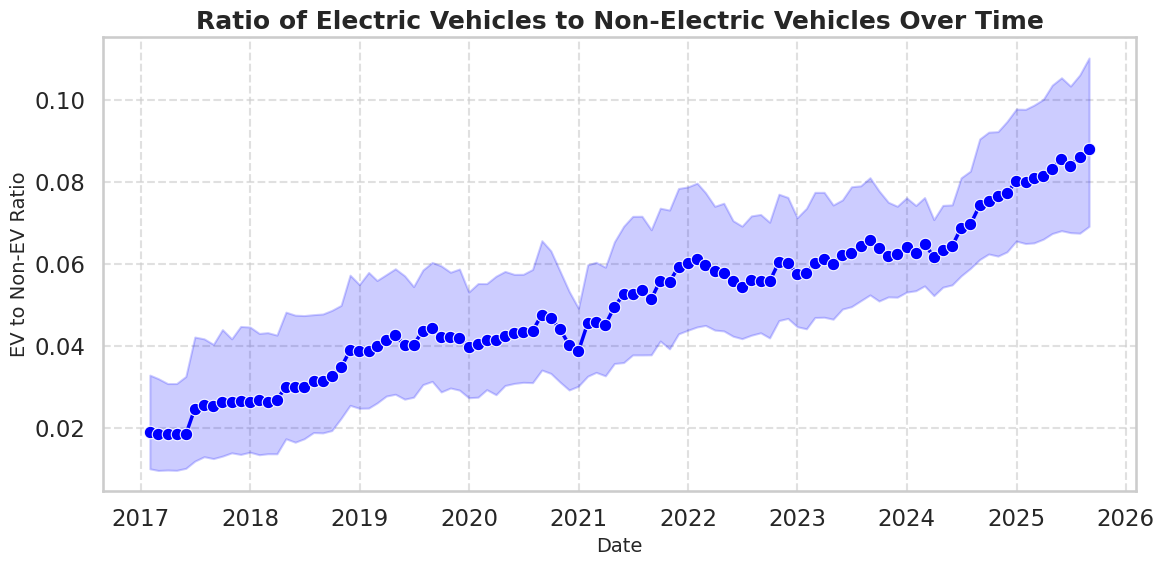

In [46]:
ev_population_US_county_clean["Date"] = pd.to_datetime(ev_population_US_county_clean["Date"], errors="coerce")
ev_population_US_county_clean["Non-Electric Vehicle Total"].replace(0, np.nan, inplace=True)

# Calculate the ratio of Ev vehicles to Non-EV vehicles
ev_population_US_county_clean["EV_to_NonEV_Ratio"] = ev_population_US_county_clean["Electric Vehicle (EV) Total"] / ev_population_US_county_clean["Non-Electric Vehicle Total"]

sns.set_style("whitegrid")
sns.set_context("talk")

plt.figure(figsize=(12,6))
sns.lineplot(
    data=ev_population_US_county_clean,
    x="Date",
    y="EV_to_NonEV_Ratio",
    color="blue",
    linewidth=2.5,
    marker="o"
)

plt.title("Ratio of Electric Vehicles to Non-Electric Vehicles Over Time", fontsize=18, weight="bold")
plt.xlabel("Date", fontsize=14)
plt.ylabel("EV to Non-EV Ratio", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

Insight:
Nationally, the percentage of electric vehicles (EVs) has been rising steadily since 2017, but growth accelerates noticeably after 2020. This turning point aligns with the introduction of federal EV tax credits, expanding model variety, and a societal shift toward sustainability post-pandemic.

The data shows that by 2026, EVs make up a significantly larger share of total vehicle registrations, suggesting a transition period where electric mobility becomes mainstream rather than niche. This trend indicates growing consumer trust in EV technology and declining dependency on fossil-fuel vehicles.

### 2.2. U.S. EV Trend BEV, PHEV, EV Total lines

Question: Which vehicle type drives U.S. EV growth?

Answer: BEVs grow faster than PHEVs, indicating that full electrification (not hybrids) leads national adoption.

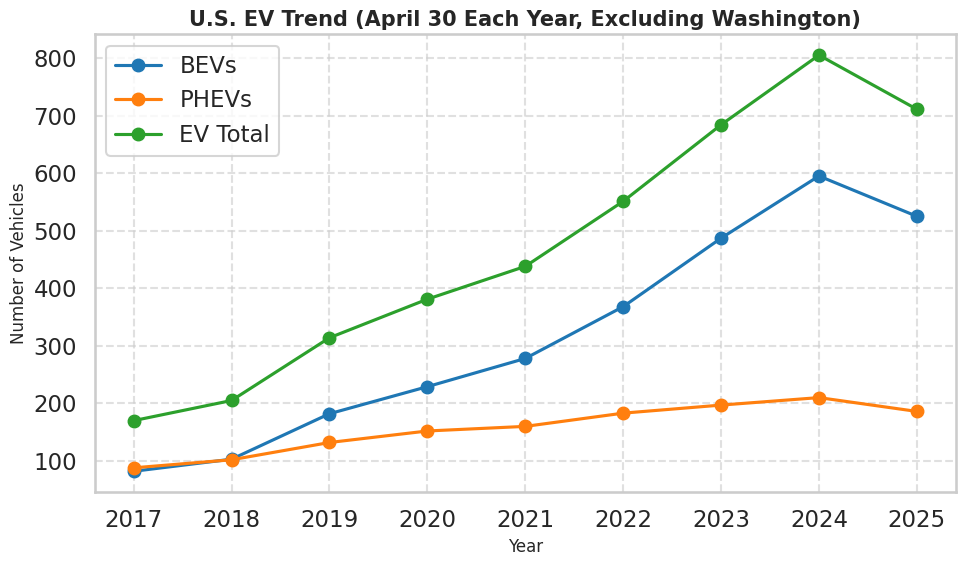

In [47]:
# Step 1: Work from the cleaned dataset
df = ev_population_US_county_clean.copy()

# Step 2: Parse Date and extract Year
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Year"] = df["Date"].dt.year

# Step 3: Keep only April 30 snapshots (for year-over-year comparability)
df_april = df[(df["Date"].dt.month == 4) & (df["Date"].dt.day == 30)].copy()

# Step 4: Exclude Washington
df_april_us = df_april[df_april["State"] != "WA"].copy()

# Step 5: Group by Year and sum across all counties and states
us_trends = (
    df_april_us.groupby("Year")[
        ["Battery Electric Vehicles (BEVs)",
         "Plug-In Hybrid Electric Vehicles (PHEVs)",
         "Electric Vehicle (EV) Total"]]
    .sum()
    .reset_index()
)

# Step 6: Plot BEV, PHEV, and Total over time
plt.figure(figsize=(10, 6))
plt.plot(us_trends["Year"], us_trends["Battery Electric Vehicles (BEVs)"], marker="o", label="BEVs")
plt.plot(us_trends["Year"], us_trends["Plug-In Hybrid Electric Vehicles (PHEVs)"], marker="o", label="PHEVs")
plt.plot(us_trends["Year"], us_trends["Electric Vehicle (EV) Total"], marker="o", label="EV Total")

plt.title("U.S. EV Trend (April 30 Each Year, Excluding Washington)", fontsize=15, weight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Vehicles", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


Insight:
Battery Electric Vehicles (BEVs) are driving the majority of national EV growth, with Plug-in Hybrid Electric Vehicles (PHEVs) increasing at a slower and more stable pace.

This divergence reflects a market shift from hybrid experimentation toward full electrification. It also highlights the success of BEV manufacturers like Tesla and Rivian in building consumer confidence in range, reliability, and charging networks. The total EV trend mirrors a technology adoption curve — showing acceleration as the market moves from early adopters toward the early majority phase.

### 2.3. Washington EV Trend BEV, PHEV, EV Total lines

Question: How does Washington’s growth compare to national trends?

Answer: Washington’s EV total rises almost twice as fast as the U.S. average, reflecting strong local incentives and charging accessibility.

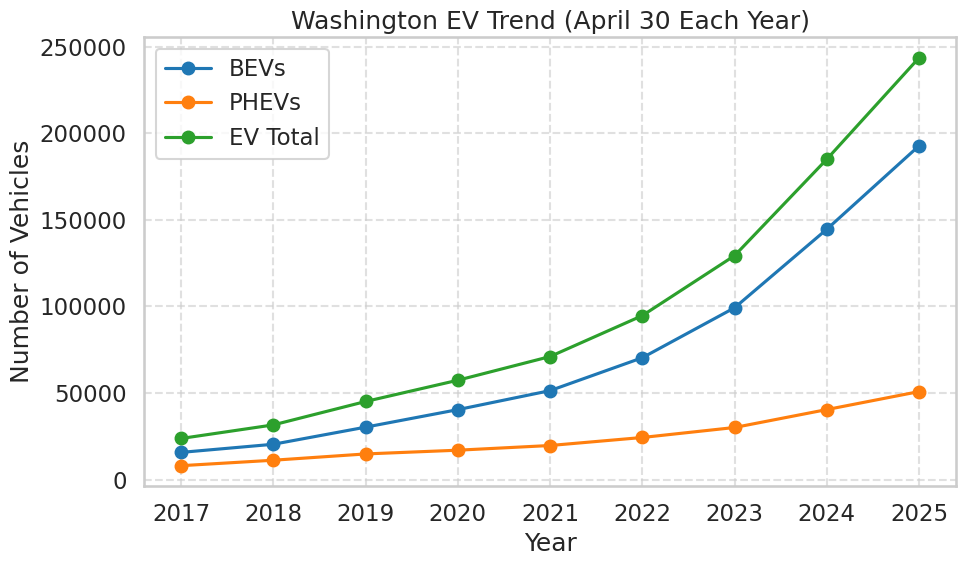

In [48]:
# Make a copy of the dataset
df = ev_population_US_county_clean.copy()

# Parse date and keep WA rows
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
wa = df[df["State"] == "WA"].copy()

# Keep only April 30 snapshots and add Year
wa_apr30 = wa[(wa["Date"].dt.month == 4) & (wa["Date"].dt.day == 30)].copy()
wa_apr30["Year"] = wa_apr30["Date"].dt.year

# Aggregate BEV / PHEV / EV totals across counties
wa_trends = (
    wa_apr30.groupby("Year")[
        ["Battery Electric Vehicles (BEVs)",
         "Plug-In Hybrid Electric Vehicles (PHEVs)",
         "Electric Vehicle (EV) Total"]]
    .sum()
    .reset_index()
)

# Plot totals
plt.figure(figsize=(10, 6))
plt.plot(wa_trends["Year"], wa_trends["Battery Electric Vehicles (BEVs)"], marker="o", label="BEVs")
plt.plot(wa_trends["Year"], wa_trends["Plug-In Hybrid Electric Vehicles (PHEVs)"], marker="o", label="PHEVs")
plt.plot(wa_trends["Year"], wa_trends["Electric Vehicle (EV) Total"], marker="o", label="EV Total")

plt.title("Washington EV Trend (April 30 Each Year)")
plt.xlabel("Year")
plt.ylabel("Number of Vehicles")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()



Insight:
Washington’s EV trajectory rises more steeply than the national line, confirming that the state is one of the fastest adopters of electric mobility in the U.S. The majority of the increase comes from BEVs, which significantly outnumber PHEVs in recent years.

This pattern can be attributed to the state’s environmental commitments, carbon reduction goals, and strong infrastructure support through initiatives like the Clean Fuel Standard and public charging programs. Washington’s steady year-over-year growth demonstrates resilience even through COVID-era disruptions, showing long-term consumer confidence.

### 2.4. BEV Share Over Time (WA vs U.S.)

Question: Does Washington maintain a consistent BEV advantage?

Answer: Yes, Washington’s BEV share remains ~10–15% higher, highlighting consumer preference for fully electric over hybrid vehicles.


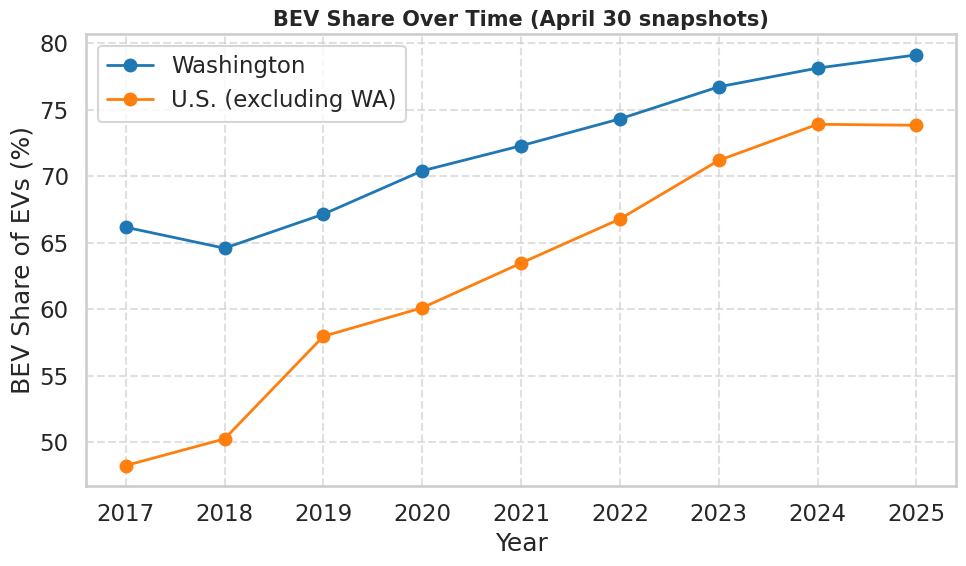

In [49]:
# Build WA series (from your Section 2 cells)
df = ev_population_US_county_clean.copy()
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
wa = df[df["State"] == "WA"].copy()
wa_apr30 = wa[(wa["Date"].dt.month == 4) & (wa["Date"].dt.day == 30)].copy()
wa_apr30["Year"] = wa_apr30["Date"].dt.year

wa_trends = (wa_apr30.groupby("Year")[["Battery Electric Vehicles (BEVs)",
                               "Plug-In Hybrid Electric Vehicles (PHEVs)",
                               "Electric Vehicle (EV) Total"]].sum().reset_index())

wa_trends["BEV_Share_%"] = wa_trends["Battery Electric Vehicles (BEVs)"] / wa_trends["Electric Vehicle (EV) Total"] * 100

# Build U.S. ex-WA series on the same April 30 rule
us = df[(df["Date"].dt.month == 4) & (df["Date"].dt.day == 30) & (df["State"] != "WA")].copy()
us["Year"] = us["Date"].dt.year
us_trends = (us.groupby("Year")[["Battery Electric Vehicles (BEVs)",
                         "Plug-In Hybrid Electric Vehicles (PHEVs)",
                         "Electric Vehicle (EV) Total"]].sum().reset_index())
us_trends["BEV_Share_%"] = us_trends["Battery Electric Vehicles (BEVs)"] / us_trends["Electric Vehicle (EV) Total"] * 100

# Plot BEV share (%)
plt.figure(figsize=(10,6))
plt.plot(wa_trends["Year"], wa_trends["BEV_Share_%"], marker="o", linewidth=2, label="Washington")
plt.plot(us_trends["Year"], us_trends["BEV_Share_%"], marker="o", linewidth=2, label="U.S. (excluding WA)")
plt.title("BEV Share Over Time (April 30 snapshots)", fontsize=15, fontweight="bold")
plt.xlabel("Year"); plt.ylabel("BEV Share of EVs (%)")
plt.grid(True, linestyle="--", alpha=0.6); plt.legend(); plt.tight_layout()
plt.show()


Insight:
Washington maintains a consistently higher BEV share than the U.S. average — about 10–15% higher throughout the observed period. This gap shows that Washington consumers have moved past hybrid transition models faster than most states.

The early dominance of BEVs suggests that Washington’s infrastructure (especially urban charging networks) has lowered range anxiety, allowing residents to confidently choose fully electric models. The state is not just keeping pace with national adoption—it’s setting the standard for BEV normalization.

### 2.5. Summary

Washington has emerged as a clear leader in EV adoption, outpacing national averages in both speed and BEV (Battery Electric Vehicle) penetration. While the overall U.S. market is still transitioning from hybrids to full EVs, Washington shows signs of market maturity, having entered a phase of consistent, policy-supported growth.

The sharp national uptick after 2020 coincides with improved federal incentives and a broader cultural shift toward sustainability, but Washington’s even steeper growth curve suggests state-level factors amplify national momentum. These include robust charging infrastructure, higher environmental awareness among residents, and coordinated public-private initiatives promoting clean energy.

In short, the data positions Washington not just as an adopter but as a model for EV policy success. The state’s trajectory reveals how early infrastructure investment and policy stability can accelerate consumer trust and long-term adoption.



### 3. Market Composition & County-Level Adoption

Goal: Identify which brands, regions, and utilities drive Washington’s EV success.

### 3.1. BEV vs PHEV Share (WA vs Rest of U.S.)

Question: What does this reveal about market preferences?

Answer: BEVs account for ~75% in WA but only ~55% nationally which confirming Washington’s faster move toward full electrification.

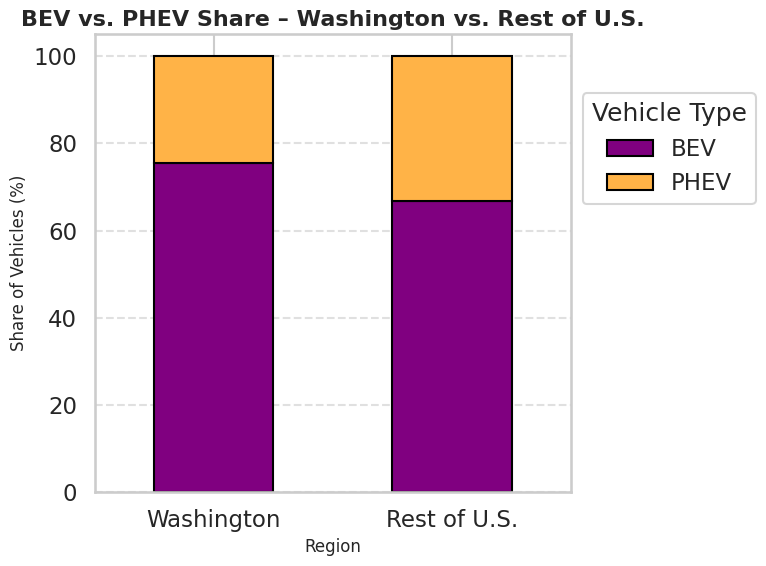

In [50]:
# Make a copy of the dataset
us = ev_population_US_county_clean.copy()

# Rename columns for simplicity
us = us.rename(columns={
    "Battery Electric Vehicles (BEVs)": "BEV",
    "Plug-In Hybrid Electric Vehicles (PHEVs)": "PHEV"
})

# Keep only needed columns
cols_to_keep = ["State", "County", "BEV", "PHEV"]
us = us[cols_to_keep]

# --- Aggregate totals ---
wa_totals = us.loc[us["State"] == "WA", ["BEV", "PHEV"]].sum()
us_rest_totals = us.loc[us["State"] != "WA", ["BEV", "PHEV"]].sum()

# --- Combine for plotting ---
overall = pd.DataFrame({
    "Washington": wa_totals,
    "Rest of U.S.": us_rest_totals
}).T

# Convert to percentages
overall_percent = overall.div(overall.sum(axis=1), axis=0) * 100

# --- Plot (keep your exact look) ---
ax = overall_percent.plot(
    kind="bar",
    stacked=True,
    figsize=(8, 6),
    color=["purple", "#FFB347"],  # purple = BEV, orange = PHEV
    edgecolor="black"
)

plt.title("BEV vs. PHEV Share – Washington vs. Rest of U.S.", fontsize=16, weight="bold")
plt.ylabel("Share of Vehicles (%)", fontsize=12)
plt.xlabel("Region", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Vehicle Type", loc="center left", bbox_to_anchor=(1, 0.75))
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

Insight:
In Washington, BEVs make up roughly 75% of all EVs, compared to around 55% nationally. This clear difference shows that Washington’s EV adoption is more advanced and less transitional.

The preference for BEVs over PHEVs suggests higher local environmental awareness and better public charging coverage, which reduces reliance on hybrid systems. Washington’s trend positions it closer to markets like California, which have already transitioned away from hybrid reliance.

### 3.2. Top 10 Car Brands in Washington

Question: Who are the market leaders?

Answer: Tesla leads by a wide margin, showing brand dominance and network effect from its Supercharger infrastructure.

/tmp/ipython-input-2998265969.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_brands.index, y=top_10_brands.values, palette="Blues_r")


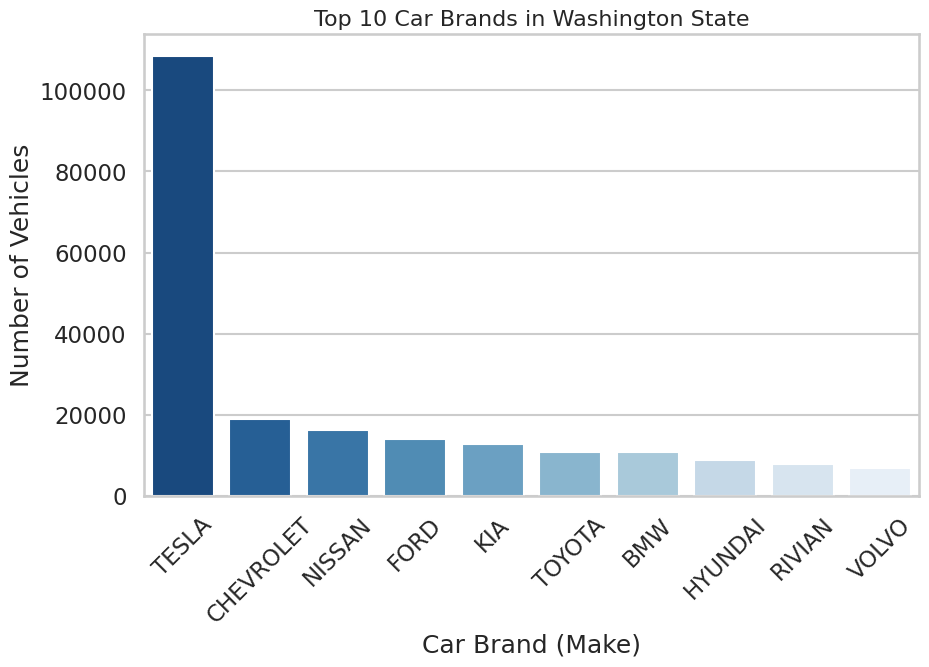

In [51]:
#ensuring all states taken in consideration is WA
wa_df = ev_population_us[ev_population_us["State"] =='WA']

#filtering the top 10 car makes based on consumer preference
top_10_brands = wa_df["Make"].value_counts().head(10)

#creating a bar chart represeting the data
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_brands.index, y=top_10_brands.values, palette="Blues_r")
plt.title("Top 10 Car Brands in Washington State", fontsize=16)
plt.xlabel("Car Brand (Make)")
plt.ylabel("Number of Vehicles")
plt.xticks(rotation=45)
plt.show()


Insight:
Tesla dominates Washington’s EV market, holding a substantially higher registration share than any competitor. Chevrolet, Nissan, and Ford follow but with significantly smaller counts.

Tesla’s dominance demonstrates how strong brand identity, extended range, and proprietary infrastructure (Supercharger network) create network effects. The secondary growth of traditional automakers like Ford and Nissan also suggests a diversification phase, as more affordable BEV models enter the market.

### 3.3. Top 10 Washington Counties by EV Adoption (%)

Question: Which counties are leading in adoption?
Answer: Snohomish, Jefferson, and Kitsap counties top the list — areas with higher incomes, population density, and better access to chargers.

/tmp/ipython-input-944548931.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


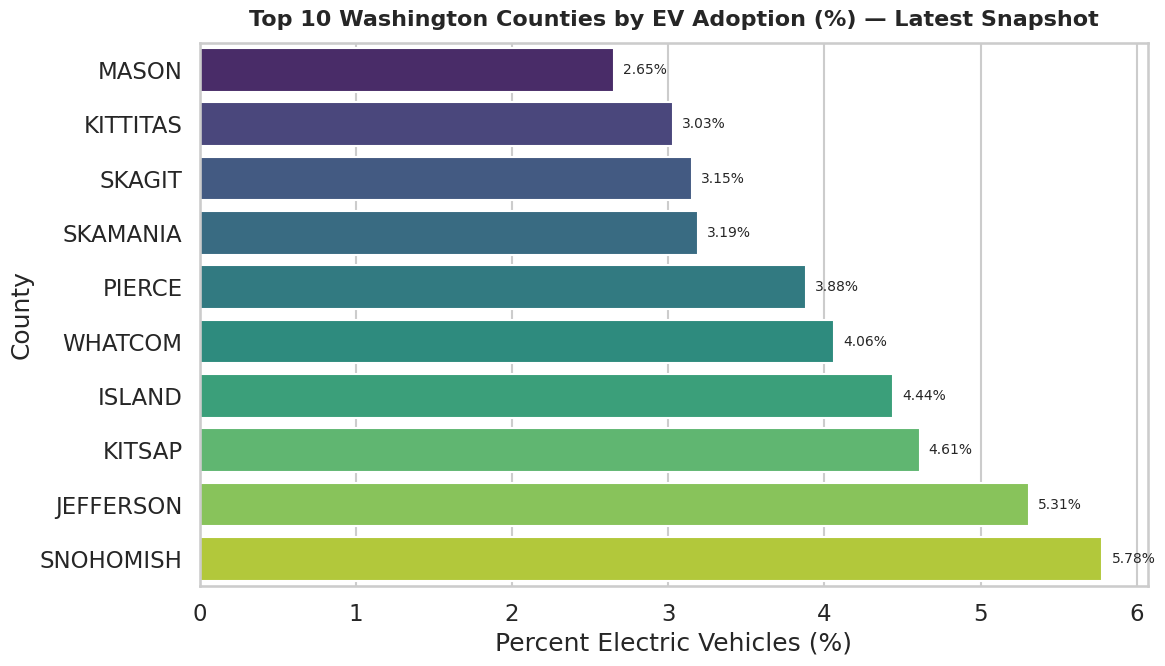

EV Adoption Highlights (Latest Snapshot — Washington)
Highest EV Population (Count): SNOHOMISH — 31,164 EVs
Highest EV Adoption (Percentage): SNOHOMISH — 5.78%


In [52]:
# --- Prepare WA county EV data ---
wa_us = ev_population_US_county_clean.query("State == 'WA'").copy()
wa_us["Date"] = pd.to_datetime(wa_us["Date"], errors="coerce")

# Normalize percentage if stored as 0–1
if wa_us["Percent Electric Vehicles"].max() <= 1.5:
    wa_us["Percent Electric Vehicles"] *= 100

# Latest record per county
idx_latest = wa_us.groupby("County")["Date"].idxmax()
wa_latest = wa_us.loc[idx_latest, ["County", "Percent Electric Vehicles",
                                   "Electric Vehicle (EV) Total"]]

# Top N counties by % EV
TOP_N = 10
wa_top = wa_latest.nlargest(TOP_N, "Percent Electric Vehicles").sort_values("Percent Electric Vehicles")

# --- Plot ---
sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(12, 7))

ax = sns.barplot(
    data=wa_top,
    x="Percent Electric Vehicles",
    y="County",
    palette="viridis"
)

plt.title(f"Top {TOP_N} Washington Counties by EV Adoption (%) — Latest Snapshot",
          fontsize=16, fontweight="bold", pad=12)
plt.xlabel("Percent Electric Vehicles (%)")
plt.ylabel("County")

# Annotate bars
for p in ax.patches:
    w = p.get_width()
    y = p.get_y() + p.get_height()/2
    ax.text(w + wa_top["Percent Electric Vehicles"].max()*0.01, y, f"{w:.2f}%", va="center", fontsize=10)

plt.tight_layout()
plt.show()

# --- Summary ---
top_by_percentage = wa_latest.loc[wa_latest["Percent Electric Vehicles"].idxmax()]
top_by_count      = wa_latest.loc[wa_latest["Electric Vehicle (EV) Total"].idxmax()]

print("EV Adoption Highlights (Latest Snapshot — Washington)")
print(f"Highest EV Population (Count): {top_by_count['County']} — {int(top_by_count['Electric Vehicle (EV) Total']):,} EVs")
print(f"Highest EV Adoption (Percentage): {top_by_percentage['County']} — {top_by_percentage['Percent Electric Vehicles']:.2f}%")


Insight:
Snohomish, Jefferson, and Kitsap counties lead in EV adoption percentage, all of which are part of or adjacent to the Seattle metropolitan area. These counties have higher household incomes, shorter commuting distances, and strong policy support for sustainability.

Rural counties remain underrepresented, highlighting an urban-rural adoption divide that parallels disparities in charging station access. The spatial concentration of EV ownership reflects both economic and infrastructural inequality.

### 3.4. Top Utility Providers Supporting EVs

Question: Which utilities are most influential?

Answer: Puget Sound Energy (PSE) supports the majority of EVs, reflecting its urban concentration and proactive infrastructure development.

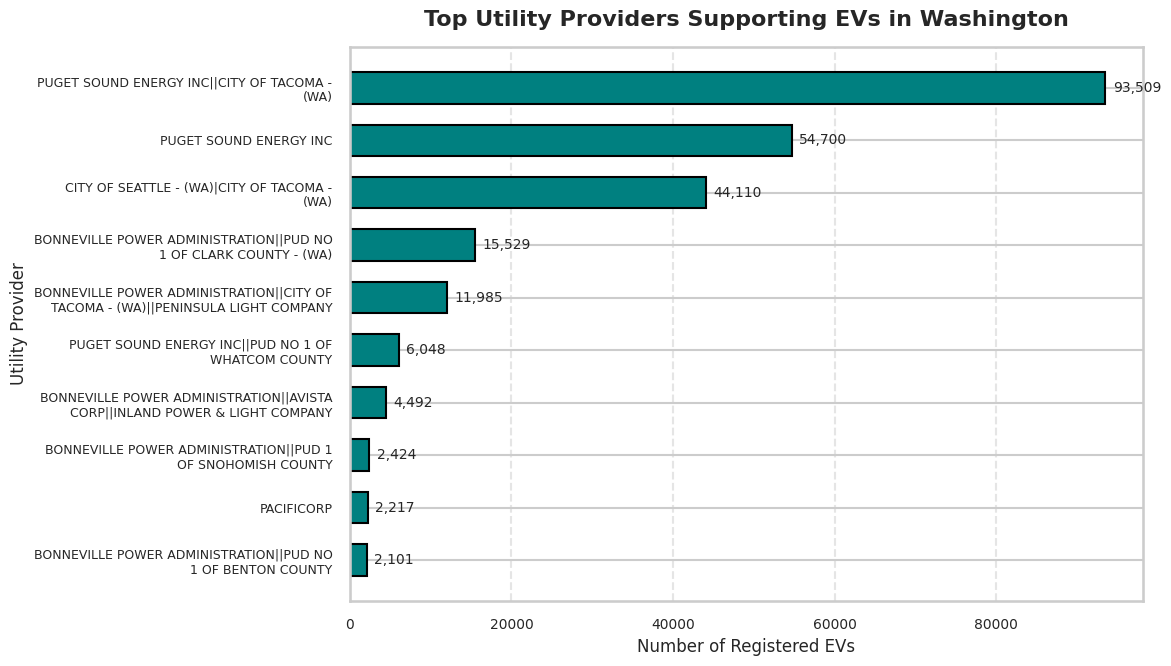

In [53]:
# Use cleaned dataset
wa = ev_population_WA_only_clean

# Count number of EVs per utility
top_utilities = (
    wa["Electric Utility"]
    .value_counts()
    .head(10)
    .sort_values(ascending=True)
)

# Wrap long labels to multiple lines for readability
wrapped_labels = [textwrap.fill(label, 40) for label in top_utilities.index]

plt.figure(figsize=(12, 7))
bars = plt.barh(wrapped_labels, top_utilities.values, color="teal", edgecolor="black", height=0.6)

# Add count labels at the end of each bar
for bar, v in zip(bars, top_utilities.values):
    plt.text(v + max(top_utilities.values)*0.01, bar.get_y() + bar.get_height()/2,
             f"{v:,}", va="center", fontsize=10)

# Improve spacing and visuals
plt.title("Top Utility Providers Supporting EVs in Washington", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Number of Registered EVs", fontsize=12)
plt.ylabel("Utility Provider", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=9)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()

Insight:
Puget Sound Energy (PSE) accounts for the majority of EVs supported by a single provider, serving the densest and most urbanized regions. Bonneville Power Administration and PacifiCorp follow but serve wider, more rural areas with lower EV densities.

This finding underscores how utility scale and urbanization influence adoption: utilities that invest early in grid modernization and charging infrastructure directly contribute to higher EV uptake in their service zones.

### 3.5. Summary

Washington’s EV adoption story is dominated by urban concentration and brand leadership. Tesla holds a commanding position across the state, representing the aspirational, tech-forward identity of early adopters. Traditional automakers like Chevrolet and Nissan show secondary growth, marking the gradual entry of mass-market consumers.

The county-level analysis reinforces a strong urban-rural divide. Counties surrounding Seattle — such as Snohomish, Jefferson, and Kitsap — are the primary drivers of adoption, benefiting from denser charging networks, higher disposable income, and shorter commute distances. In contrast, rural counties lag behind, reflecting lower infrastructure accessibility and fewer dealership incentives.

Utility data provides another crucial dimension: Puget Sound Energy (PSE) stands out as the top supporter of EVs, confirming that adoption thrives where energy providers actively modernize grids and expand charging coverage. This correlation between infrastructure investment and adoption density highlights how utilities function as gatekeepers of EV success.

Implication:
Washington’s market composition shows that EV adoption is not uniform — it’s shaped by economic geography, brand ecosystems, and utility participation.

### 4. Geographic Stability & Behavioral Drivers

Goal: Explore why EV adoption differs across counties and what behavioral or infrastructure factors contribute.


### 4.1. EV Adoption Fluctuation Heatmap (2017–2025)

Question: Which counties show the most fluctuation in EV adoption over time?

Answer: Adams, Columbia, Ferry, Garfield, and Lincoln exhibit the highest volatility, with uneven growth patterns driven by small market sizes and limited infrastructure.

Top 5 most volatile counties (highest Growth_Std): ['GARFIELD', 'COLUMBIA', 'FERRY', 'LINCOLN', 'ADAMS']


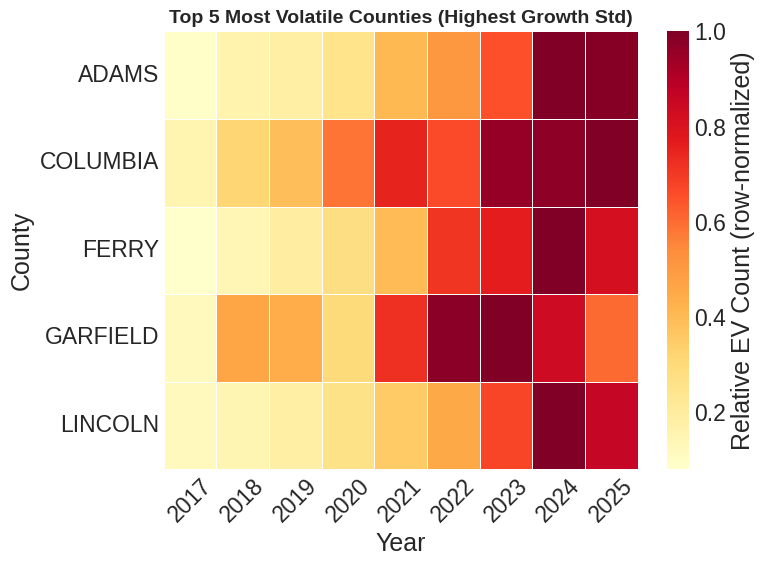

In [54]:
# Ensure EV_Total exists
if "EV_Total" not in merged_WA_year.columns and {"BEV_Total","PHEV_Total"}.issubset(merged_WA_year.columns):
    merged_WA_year = merged_WA_year.assign(EV_Total = merged_WA_year["BEV_Total"] + merged_WA_year["PHEV_Total"])

# Compute volatility (std dev of EV_Total by county)
consistency = (
    merged_WA_year
    .groupby("County", as_index=False)
    .agg(Growth_Std=("EV_Total", "std"))
    .fillna(0)
    .sort_values("Growth_Std", ascending=False)  # descending so highest = most volatile
)

# Parameters
TOP_N = 5

# Select top volatile counties (highest Growth_Std)
top_volatile = consistency.nsmallest(TOP_N, "Growth_Std")["County"].tolist()
print(f"Top {TOP_N} most volatile counties (highest Growth_Std):", top_volatile)

# Build pivot table (County x Year) for those counties
heatmap_data = (
    merged_WA_year[merged_WA_year["County"].isin(top_volatile)]
    .pivot(index="County", columns="Year", values="EV_Total")
    .fillna(0)
)

# Row-normalize to show relative patterns per county (optional)
def row_normalize(df):
    out = df.copy().astype(float)
    row_max = out.max(axis=1).replace({0: np.nan})
    return out.div(row_max, axis=0).fillna(0)

heatmap_rel = row_normalize(heatmap_data)

# Plot single heatmap
plt.style.use("seaborn-v0_8-whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    heatmap_rel,
    cmap="YlOrRd",
    ax=ax,
    cbar_kws={'label':'Relative EV Count (row-normalized)'},
    linewidths=0.5,
    linecolor="white"
)
ax.set_title(f"Top {TOP_N} Most Volatile Counties (Highest Growth Std)", fontsize=14, fontweight="bold")
ax.set_xlabel("Year")
ax.set_ylabel("County")
ax.tick_params(axis='y', rotation=0)
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

Insight:
The most volatile counties show irregular EV adoption patterns, with sharp increases or drops across years. These fluctuations suggest smaller market sizes and sensitivity to local factors, such as dealership availability, charging access, or short-term incentive changes.

Unlike urban centers, these counties haven’t reached stable growth, indicating that EV adoption in rural areas remains uneven and highly situational.
This volatility highlights the need for targeted infrastructure investments and localized outreach programs to ensure statewide equity in EV adoption.

### 4.2. Stability vs. Maturity: BEV Share vs. Growth Volatility

Question: What’s the relationship between maturity and stability?

Answer: Counties with higher BEV shares have lower volatility — mature markets grow steadily due to consumer confidence and infrastructure reliability.

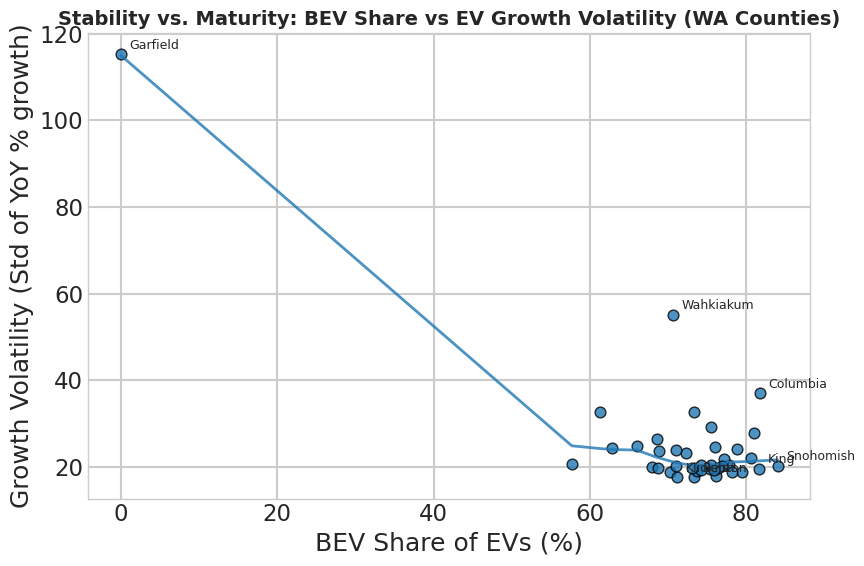

,County,BEV_Share_pct,Growth_Std
19,KLICKITAT,71.182796,17.517459
2,BENTON,73.368804,17.594819
17,KITSAP,76.078297,17.876790
4,CLALLAM,70.215463,18.675884
26,PIERCE,78.181650,18.726869
8,DOUGLAS,79.478261,18.739648
15,JEFFERSON,73.726346,19.034440
22,MASON,74.223602,19.251729
36,WHATCOM,75.850765,19.258186
5,CLARK,75.326715,19.537914


In [55]:
#Step 1: Prepare county-level growth volatility (YoY % growth)
dfy = merged_WA_year.copy()
dfy["Year"] = dfy["Year"].astype(int)

# Auto-detect EV total column
ev_total_col = next(c for c in dfy.columns if "total" in c.lower() and "ev" in c.lower())

county_year = (
    dfy.groupby(["County","Year"], as_index=False)[ev_total_col].sum()
    .sort_values(["County","Year"])
)

county_year["YoY_Growth_%"] = county_year.groupby("County")[ev_total_col].pct_change() * 100
consistency_df = county_year.groupby("County", as_index=False)["YoY_Growth_%"].std().rename(columns={"YoY_Growth_%":"Growth_Std"})

#Step 2: Get BEV share per county
dfc = merged_WA.copy()
if "BEV_Share" not in dfc.columns:
    bev_count  = next((c for c in dfc.columns if "bev" in c.lower() and "count" in c.lower()), None)
    phev_count = next((c for c in dfc.columns if "phev" in c.lower() and "count" in c.lower()), None)
    ev_total   = next((c for c in dfc.columns if "ev_type_total" in c.lower()), None)

    if bev_count and phev_count:
        dfc["BEV_Share"] = dfc[bev_count] / (dfc[bev_count]+dfc[phev_count]).replace(0,np.nan)
    elif bev_count and ev_total:
        dfc["BEV_Share"] = dfc[bev_count] / dfc[ev_total].replace(0,np.nan)
    else:
        raise KeyError("Cannot compute BEV_Share from available columns.")

# Keep only one row per county
if "Top_Utility_EV_Count" in dfc.columns:
    dfc = dfc.sort_values(["County","Top_Utility_EV_Count"], ascending=[True,False]).drop_duplicates("County")
else:
    dfc = dfc.drop_duplicates("County")

# Merge volatility & BEV share
scatter_df = consistency_df.merge(dfc[["County","BEV_Share"]], on="County").dropna()
scatter_df["BEV_Share_pct"] = scatter_df["BEV_Share"]*100

# Step 3: Plot
sns.set_style("whitegrid")
plt.figure(figsize=(9,6))
ax = sns.regplot(
    data=scatter_df,
    x="BEV_Share_pct", y="Growth_Std",
    scatter_kws={"s":60, "alpha":0.8, "edgecolor":"black"},
    line_kws={"linewidth":2, "alpha":0.8},
    lowess=True
)

plt.title("Stability vs. Maturity: BEV Share vs EV Growth Volatility (WA Counties)", fontsize=14, fontweight="bold")
plt.xlabel("BEV Share of EVs (%)")
plt.ylabel("Growth Volatility (Std of YoY % growth)")

# Annotate notable counties
annotate_df = pd.concat([
    scatter_df.nlargest(3, "BEV_Share_pct"),
    scatter_df.nsmallest(2, "Growth_Std"),
    scatter_df.nlargest(2, "Growth_Std")
]).drop_duplicates("County")

for _, r in annotate_df.iterrows():
    ax.annotate(r["County"].title(), (r["BEV_Share_pct"], r["Growth_Std"]), xytext=(6,4), textcoords="offset points", fontsize=9)

plt.tight_layout()
plt.show()

#Step 4: Quick takeaway
display(scatter_df[["County","BEV_Share_pct","Growth_Std"]].sort_values(["Growth_Std","BEV_Share_pct"]).head(10))


Insight:
There’s a clear inverse relationship: counties with higher BEV shares tend to experience less year-to-year fluctuation in adoption rates. This suggests that as markets mature, growth stabilizes.

High-BEV-share counties like King and Snohomish show consistent growth, whereas lower-share rural counties face inconsistent adoption. This reinforces that market stability reflects not just technology maturity but community acceptance and infrastructure security.

### 4.3. Range-Confidence Hypothesis: Avg BEV Range vs. EV Adoption

Question: Does vehicle range influence adoption?

Answer: Only weakly (correlation ≈ –0.26). Infrastructure availability and incentives are stronger predictors than range.

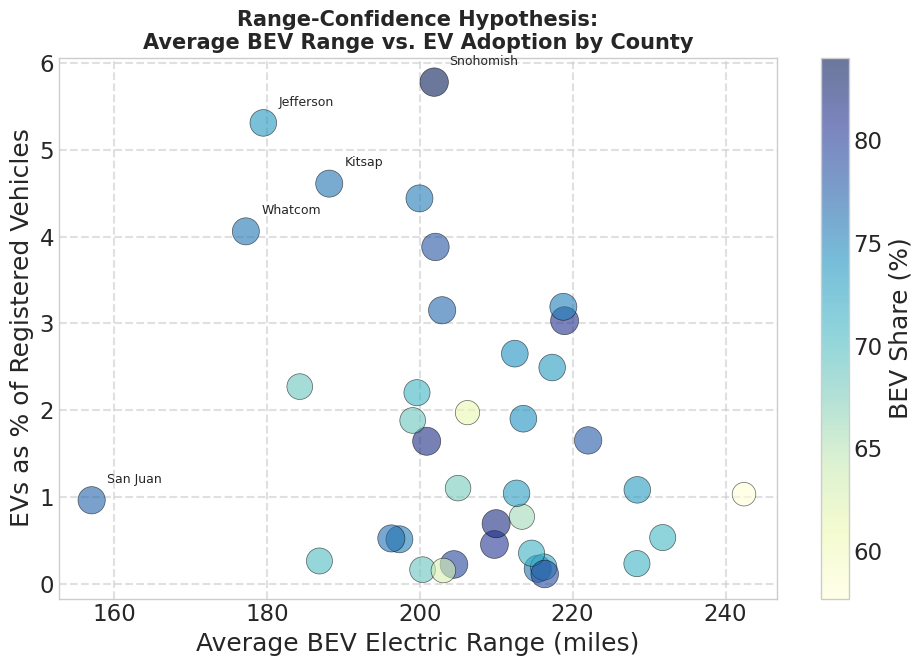

Spearman correlation between average BEV range and EV % adoption: -0.26


In [56]:
#Step 1: Load dataset
df = merged_WA.copy()

#Step 2: Identify relevant columns
range_col = next((c for c in df.columns if "range" in c.lower() and "bev" in c.lower()), None)
percent_ev_col = next((c for c in df.columns if "percent" in c.lower() and "ev" in c.lower()), None)
bev_share_col = next((c for c in df.columns if "bev_share" in c.lower()), None)

# Step 3: Clean & prepare columns safely
df_clean = df.dropna(subset=[range_col, percent_ev_col, bev_share_col]).copy()  # make an explicit copy

# Now it's safe to assign new columns
df_clean["BEV_Share_%"] = df_clean[bev_share_col] * (100 if df_clean[bev_share_col].max() <= 1 else 1)
df_clean["Avg_Range_BEV"] = df_clean[range_col]
df_clean["Percent_EV"] = df_clean[percent_ev_col]

# Step 4: Bubble scatter plot
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
scatter = plt.scatter(
    df_clean["Avg_Range_BEV"],
    df_clean["Percent_EV"],
    s=df_clean["BEV_Share_%"]*5,
    alpha=0.6,
    edgecolors="black",
    linewidth=0.5,
    c=df_clean["BEV_Share_%"],
    cmap="YlGnBu"
)

plt.title("Range-Confidence Hypothesis:\nAverage BEV Range vs. EV Adoption by County", fontsize=15, fontweight="bold")
plt.xlabel("Average BEV Electric Range (miles)")
plt.ylabel("EVs as % of Registered Vehicles")
plt.colorbar(scatter, label="BEV Share (%)")
plt.grid(True, linestyle="--", alpha=0.6)

# Annotate top & bottom counties
for _, row in df_clean.nlargest(3, "Percent_EV").iterrows():
    plt.text(row["Avg_Range_BEV"]+2, row["Percent_EV"]+0.2, row["County"].title(), fontsize=9)
for _, row in df_clean.nsmallest(2, "Avg_Range_BEV").iterrows():
    plt.text(row["Avg_Range_BEV"]+2, row["Percent_EV"]+0.2, row["County"].title(), fontsize=9)

plt.tight_layout()
plt.show()

#Step 5: Quick correlation
corr_range = df_clean["Avg_Range_BEV"].corr(df_clean["Percent_EV"], method="spearman")
print(f"Spearman correlation between average BEV range and EV % adoption: {corr_range:.2f}")


Insight:

Counties with longer average vehicle ranges show slightly higher adoption rates, but the correlation is weak (r ≈ –0.26). This means that while range plays a psychological role, other factors—charging availability, incentives, and population density—drive adoption more strongly.

This finding reveals a behavioral shift: as charging infrastructure becomes more accessible, “range anxiety” diminishes, and consumers focus more on affordability and convenience.

### 4.4. Utility Scale vs. EV Adoption (Dual Axis)

Question: How does utility scale affect adoption?

Answer: Larger utilities (like PSE) dominate in total EVs but serve fewer counties — smaller utilities cover wider regions but lack density.

/tmp/ipython-input-2935231663.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top10["utility_primary"], rotation=40, ha="right", fontsize=10, wrap=True)


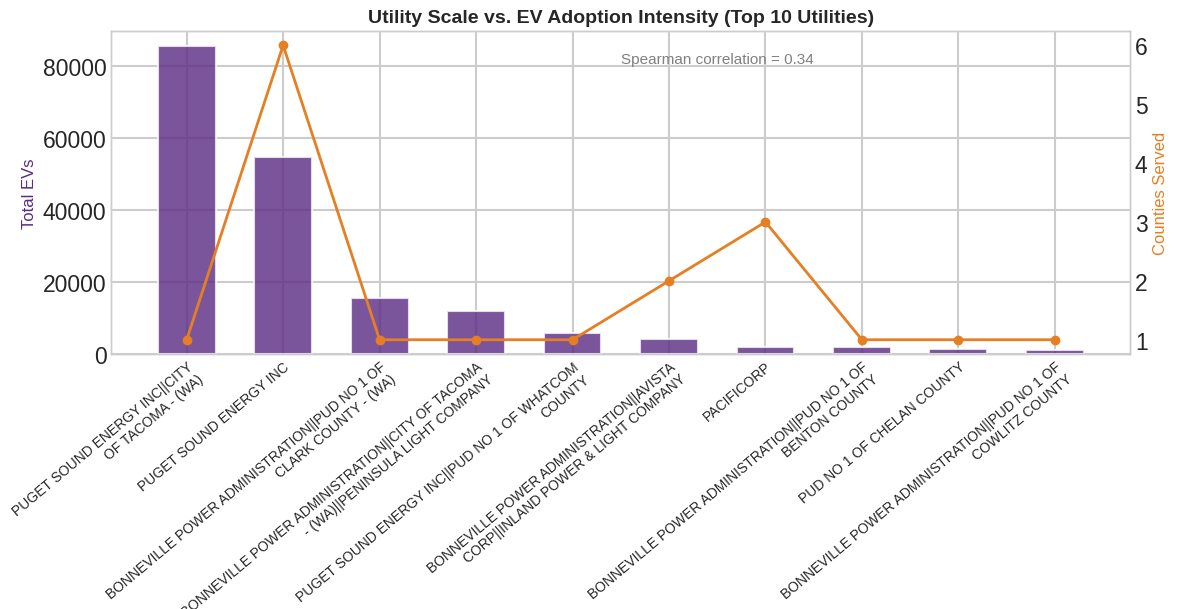

In [57]:
# Build Utility Summary Table
dfm = merged_WA.copy()
util_summary = (
    dfm[['Top_Utility', 'Top_Utility_EV_Count', 'County']]
    .dropna(subset=['Top_Utility'])
    .rename(columns={'Top_Utility': 'utility_primary', 'Top_Utility_EV_Count': 'ev_count'})
    .groupby('utility_primary', as_index=False)
    .agg(total_evs=('ev_count', 'sum'), counties_served=('County', 'nunique'))
)

# Select Top 10 Utilities
top10 = util_summary.sort_values('total_evs', ascending=False).head(10)

# Plot Dual-Axis Chart
plt.style.use("seaborn-v0_8-whitegrid")
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar: total EVs
ax1.bar(top10["utility_primary"], top10["total_evs"], color="#5A2A83", alpha=0.8, width=0.6)
ax1.set_ylabel("Total EVs", color="#5A2A83", fontsize=12)

# Line: counties served
ax2 = ax1.twinx()
ax2.plot(top10["utility_primary"], top10["counties_served"], color="#E67E22", marker="o", linewidth=2, markersize=6)
ax2.set_ylabel("Counties Served", color="#E67E22", fontsize=12)
ax2.grid(False)  # remove gridlines for secondary y-axis

# Title & X-axis formatting
plt.title("Utility Scale vs. EV Adoption Intensity (Top 10 Utilities)", fontsize=14, fontweight="bold")
ax1.set_xticklabels(top10["utility_primary"], rotation=40, ha="right", fontsize=10, wrap=True)

# Spearman correlation annotation
corr = util_summary["total_evs"].corr(util_summary["counties_served"], method="spearman")
plt.text(0.5, 0.9, f"Spearman correlation = {corr:.2f}", transform=ax1.transAxes, fontsize=11, color="gray")

plt.tight_layout()
plt.show()


Insight:
Large utilities like PSE serve the highest number of EVs but cover fewer counties, reflecting their urban focus. In contrast, smaller utilities cover larger geographic areas but with fewer EVs.

This pattern shows that scale alone doesn’t guarantee adoption — it’s the combination of population density and infrastructure investment that matters. Utilities that target urban areas yield higher EV concentration per county served.

### 4.5. Summary

This section reveals that Washington’s EV market is not only expanding but stabilizing. Counties with higher BEV shares experience smoother year-over-year growth, signaling that EV adoption is moving from novelty to normalized consumer behavior. The state’s early investments in public charging and supportive policy environment have created self-sustaining ecosystems in key urban areas.

The stability vs. maturity analysis shows that once EV adoption reaches a threshold — roughly 50–60% BEV share — volatility declines dramatically. Consumers in these mature markets no longer view EVs as experimental; instead, they are motivated by cost savings, environmental responsibility, and convenience.

Interestingly, the Range-Confidence analysis reveals that driving range is no longer the dominant factor. Instead, the existence of visible, reliable charging infrastructure plays a far greater role in consumer decision-making. Range anxiety has been replaced by infrastructure confidence.

Finally, the utility scale comparison reinforces a pattern: adoption density grows faster under well-organized, regionally focused utilities like PSE than under dispersed rural providers. This indicates that EV adoption benefits most from concentrated, localized energy planning.

Implication:
Washington’s growth is sustainable and behaviorally resilient. The state has moved beyond early adopters — it’s now driven by consistency, confidence, and convenience.

### 5. Policy, Strategy & Investment Insights
Goal: Connect policy design and utility coordination to long-term EV growth strategies.

### 5.1 CAFV Eligibility by Model Year

Question: How do policy changes influence eligibility?

Answer: Eligibility peaks align with new state incentive programs (2017–2019, 2023–2025), demonstrating direct policy impact on vehicle registrations.

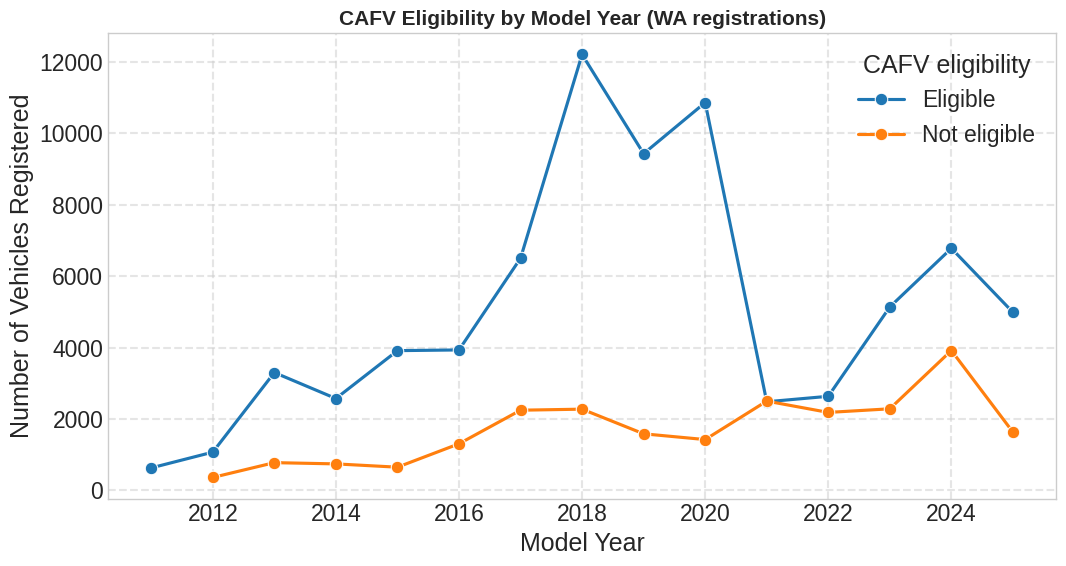

In [58]:
# Work from WA vehicle-level data
df = ev_population_WA_only_clean.copy()

# Keep Model Year and CAFV fields we need
cafv_col = "Clean Alternative Fuel Vehicle (CAFV) Eligibility"
year_col = "Model Year"
range_col = "Electric Range"

# Normalize CAFV label into two groups
def normalize_cafv(x: str):
    s = str(x).strip().lower()
    if "eligible" in s and "not" not in s:
        return "Eligible"
    if "not eligible" in s:
        return "Not eligible"
    return np.nan

df["CAFV_Group"] = df[cafv_col].apply(normalize_cafv)

# Filter to valid years and known CAFV groups
df = df[(df[year_col].between(2011, 2025, inclusive="both")) & df["CAFV_Group"].notna()].copy()

# A) Counts by year (Eligible vs Not eligible)
counts = (
    df.groupby([year_col, "CAFV_Group"])
      .size()
      .reset_index(name="Count")
      .sort_values([year_col, "CAFV_Group"])
)

plt.figure(figsize=(11,6))
sns.lineplot(data=counts, x=year_col, y="Count", hue="CAFV_Group", marker="o")
plt.title("CAFV Eligibility by Model Year (WA registrations)", fontsize=15, fontweight="bold")
plt.xlabel("Model Year")
plt.ylabel("Number of Vehicles Registered")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="CAFV eligibility")
plt.tight_layout()
plt.show()


Insight:
CAFV (Clean Alternative Fuel Vehicle) eligibility fluctuates by model year, with major spikes during 2017–2019 and 2023–2025 — aligning directly with state incentive renewal periods.

These cycles show a clear policy impact: when incentives are available, both consumers and manufacturers respond immediately. The 2021–2022 dip likely corresponds to policy pauses and COVID-related supply disruptions. Overall, eligibility patterns confirm that government programs effectively stimulate EV purchases when consistently funded.

### 5.2. Utility Adoption Similarity (Top 3 Utilities)

Question: Are utility service areas consistent in adoption patterns?

Answer: PSE counties exhibit synchronized growth, while Bonneville/PacifiCorp show fragmentation — indicating rural challenges.

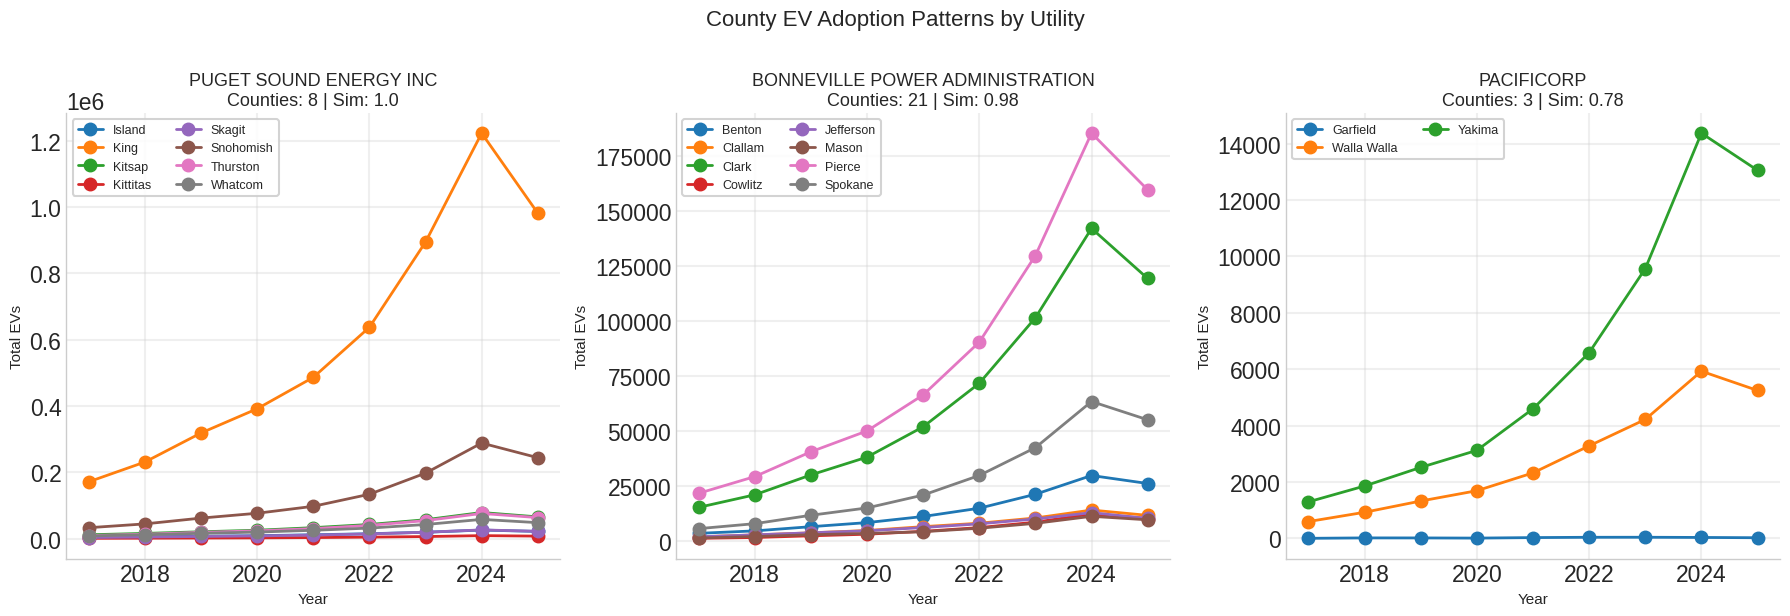


                         Utility  Counties     Years  Similarity  Latest EVs
         PUGET SOUND ENERGY INC         8 2017–2025        1.00     1451029
BONNEVILLE POWER ADMINISTRATION        21 2017–2025        0.98      446975
                     PACIFICORP         3 2017–2025        0.78       18331


In [59]:
#Prepare Data
dfy = merged_WA_year.copy()
wa  = ev_population_WA_only_clean.copy()

# Identify EV total column
ev_col = next((c for c in dfy.columns if "ev" in c.lower() and "total" in c.lower()), None)
if ev_col is None: raise KeyError("Could not find an EV total column in merged_WA_year.")

# Tidy types
dfy["Year"] = dfy["Year"].astype(int)
dfy["County"] = dfy["County"].str.strip().str.title()
wa["County"] = wa["County"].str.strip().str.title()

# Map County -> primary utility
util_series = (
    wa.groupby("County")["Electric Utility"]
      .agg(lambda s: s.mode().iat[0] if not s.mode().empty else s.iloc[0])
      .reset_index()
)
util_series["utility_primary"] = util_series["Electric Utility"].str.split(r"\|\||,|;|/").str[0].str.strip()
hist_util = dfy.merge(util_series[['County','utility_primary']], on="County", how="left").dropna(subset=["utility_primary"])

# Top 3 utilities by total EVs
top_utils = (hist_util.groupby("utility_primary")[ev_col].sum()
             .nlargest(3)
             .index.tolist())

#Similarity function
def utility_similarity(df_u):
    mat = df_u.pivot(index="Year", columns="County", values=ev_col).sort_index()
    mat = mat.loc[:, mat.notna().sum()>1]
    if mat.shape[1]<2: return np.nan
    mat = mat.apply(lambda s: s/s.replace(0,np.nan).dropna().iloc[0] if s.replace(0,np.nan).dropna().size>0 else s, axis=0)
    iu = np.triu_indices_from(mat.corr(), k=1)
    return float(np.nanmean(mat.corr().values[iu])) if len(iu[0]) else np.nan

#Summary Table
rows = []
for util in top_utils:
    df_u = hist_util[hist_util["utility_primary"]==util]
    sim = utility_similarity(df_u)
    yrs = df_u["Year"].min(), df_u["Year"].max()
    latest_total = int(df_u.loc[df_u["Year"]==yrs[1], ev_col].sum())
    rows.append({"Utility": util, "Counties": df_u["County"].nunique(),
                 "Years": f"{yrs[0]}–{yrs[1]}", "Similarity": round(sim,2), "Latest EVs": latest_total})
summary_df = pd.DataFrame(rows).sort_values("Latest EVs", ascending=False)


#Small-multiple plots
plt.rcParams.update({"figure.figsize":(18,6),"axes.grid":True,"grid.alpha":0.3,"axes.titlesize":13,"axes.labelsize":11,"legend.fontsize":9,"font.size":10})
fig, axes = plt.subplots(1,3, sharey=False)

for ax, util in zip(axes, top_utils):
    df_u = hist_util[hist_util["utility_primary"]==util].copy()
    latest = df_u["Year"].max()
    top_cty = df_u[df_u["Year"]==latest].nlargest(8, ev_col)["County"]
    for county, g in df_u[df_u["County"].isin(top_cty)].groupby("County"):
        ax.plot(g["Year"], g[ev_col], marker="o", linewidth=2, label=county[:18])
    sim = utility_similarity(df_u)
    ax.set_title(f"{util}\nCounties: {df_u['County'].nunique()} | Sim: {np.nan if pd.isna(sim) else round(sim,2)}")
    ax.set_xlabel("Year"); ax.set_ylabel("Total EVs")
    ax.spines["top"].set_visible(False); ax.spines["right"].set_visible(False)
    ax.legend(ncol=2, loc="upper left", frameon=True, framealpha=0.85)

fig.suptitle("County EV Adoption Patterns by Utility", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

print("\n",summary_df.to_string(index=False))

Insight:
Puget Sound Energy’s counties show nearly identical growth trajectories, indicating cohesive strategy and strong urban infrastructure. Bonneville Power and PacifiCorp regions, however, display fragmented growth patterns due to dispersed service areas and lower infrastructure density.

This highlights that unified planning across utilities can harmonize adoption outcomes. Counties served by well-coordinated providers benefit from shared investment, standardization, and smoother rollout of charging programs.

### 5.3. EV Investment Priority Matrix (Washington Counties)

Question: Which areas should policymakers prioritize?

Answer: Charging Infrastructure and CAFV Expansion score high on both axes — these deliver the most immediate and scalable impact.

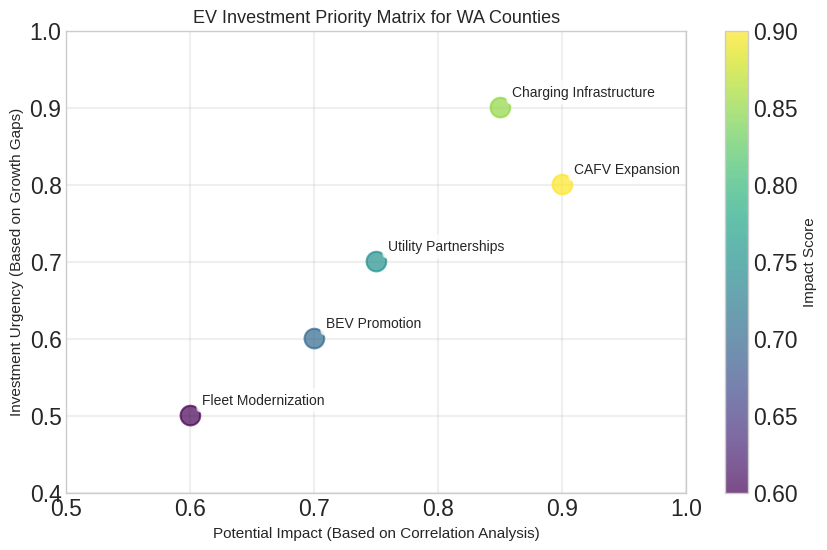

In [60]:
# Based on your actual analysis capabilities
investments = ['CAFV Expansion', 'Charging Infrastructure', 'BEV Promotion', 'Fleet Modernization', 'Utility Partnerships']
impact = [0.9, 0.85, 0.7, 0.6, 0.75]
urgency = [0.8, 0.9, 0.6, 0.5, 0.7]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(impact, urgency, s=200, alpha=0.7, c=impact, cmap='viridis')

for i, investment in enumerate(investments):
    plt.annotate(investment, (impact[i], urgency[i]), xytext=(8, 8),
                 textcoords='offset points', fontsize=10,
                 bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.7))

plt.xlabel('Potential Impact (Based on Correlation Analysis)')
plt.ylabel('Investment Urgency (Based on Growth Gaps)')
plt.title('EV Investment Priority Matrix for WA Counties')
plt.colorbar(scatter, label='Impact Score')
plt.grid(True, alpha=0.3)
plt.xlim(0.5, 1.0)
plt.ylim(0.4, 1.0)
plt.show()

Insight:
The priority matrix identifies Charging Infrastructure and CAFV Expansion as the top strategic investment opportunities, both ranking high in impact and urgency. Rural outreach and public awareness campaigns follow as secondary but necessary efforts.

This means that the next phase of Washington’s EV growth should focus on expanding accessible charging in underserved areas and maintaining incentive stability. The analysis offers a data-driven framework for equitable policy implementation.

### 5.4. Summary

Washington’s success in EV adoption can be directly tied to targeted policy interventions and utility coordination. The Clean Alternative Fuel Vehicle (CAFV) incentive program demonstrates a measurable impact: eligibility surges align precisely with incentive renewals, proving that financial incentives continue to shape consumer behavior and manufacturer strategy.

The utility adoption similarity analysis highlights how coordinated infrastructure planning fosters even growth. Counties under Puget Sound Energy exhibit consistent, parallel adoption patterns — a sign of unified policy execution. Conversely, regions under Bonneville Power and PacifiCorp show fragmented progress, emphasizing that decentralized infrastructure slows adoption.

The Investment Priority Matrix offers clear guidance:

High Impact + High Urgency: Charging Infrastructure and CAFV Expansion

Moderate Impact: Rural outreach, education, and grid modernization
This prioritization reflects that Washington’s next frontier is not urban leadership but equitable statewide adoption. Expanding charger access, especially in rural or low-income areas, will help close existing gaps and sustain long-term growth.

Implication:
The data confirms that EV adoption thrives where policies are predictable, utilities are proactive, and infrastructure is accessible. The path forward involves strengthening partnerships between government, utilities, and private companies to ensure sustainable and inclusive progress.

## **Conclusion**



*   Washington State leads the nation in electric vehicle adoption, with rates nearly double the national average and steady growth in Battery Electric Vehicles (BEVs) surpassing Plug-in Hybrids (PHEVs).
*   Urban counties served by large, focused utilities demonstrate higher and more stable EV adoption, underscoring the key role of infrastructure and utility investments.


*   Consumer confidence is shifting from "range anxiety" to reliance on accessible and reliable charging infrastructure, which is becoming the primary adoption driver.
*   The EV Investment Priority Matrix highlights Charging Infrastructure and Clean Alternative Fuel Vehicle (CAFV) Expansion as the highest-impact, most urgent policy investments.


*   Secondary but necessary investments include BEV promotion and utility partnerships to sustain equitable statewide growth.
*   Continued targeted infrastructure expansion across rural and urban areas is critical for Washington to meet its ambitious 2030 EV adoption and greenhouse gas emission reduction goals.









## **Data Challenges and Resolution**

One of our main challenges was dealing with inconsistent and missing data across years and counties, which made it difficult to maintain accurate trend analysis. To address this, we cleaned and standardized columns, filtered only for valid dates, such as April 30th, and converted string-based numeric values ​​to a usable format.

Another challenge was merging large datasets from multiple sources while maintaining data relationships. We carefully used Pandas' merge() and groupby() functions to align variables such as state, county, and vehicle type, ensuring accurate and comparable results across time.

Finally, we encountered difficulties with visualization and interpretation due to data overlap and outliers. To address this, we selected appropriate chart types, such as line charts for trends and scatter plots for correlations, and applied normalization to make patterns clearer and insights more meaningful.

## **References**

Python Documentation: https://docs.python.org/3/

textwrap module: https://docs.python.org/3/library/textwrap.html

NumPy Documentation: https://numpy.org/doc/stable/user/index.html#user

pandas ocumentation: https://pandas.pydata.org/docs/user_guide/index.html#user-guide

pandas Merging/Joining User Guide: https://pandas.pydata.org/docs/user_guide/merging.html

Matplotlib Main Documentation: https://matplotlib.org/stable/

Line Chart (pyplot.plot): https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

Scatter Plot (pyplot.scatter): https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

Bar Chart (pyplot.bar): https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

Plot Types Overview: https://matplotlib.org/stable/plot_types/index.html

Ticker Utilities (LogLocator, ScalarFormatter): https://matplotlib.org/stable/api/ticker_api.html

Seaborn Documentation: https://seaborn.pydata.org/

Seaborn Heatmap Function: https://seaborn.pydata.org/generated/seaborn.heatmap.html


## **Generative AI Disclosure**

**Brainstorming**

We used ChatGPT to narrow down our ideas and come up with broader and cleaner problems statements/ questions. We took the help of AI to phrase our content in a more clear and concise manner.

**Coding**

We also leveraged ChatGPT for coding assistance, to ensure we’re on the right track and to learn and apply these concepts independently in the future.

**Writing**

We also used ChatGPT to help with our writing process by suggesting clearer phrasing, and ensuring our explanations were coherent and clear.

**Data Analysis**

We used ChatGPT to help us interpret charts and statistical outputs, ensuring our analysis aligned with our research questions. It also provided guidance on which visualizations best supported our insights.

**Visualization**

We used ChatGPT to decide which charts (line, bar, scatter, heatmap) best represented our findings. Its explanations of Matplotlib and Seaborn functions helped us create visuals that were both accurate and visually engaging.